In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

# Домашняя работа: ансамбли

Эта домашняя работа является идейным продолжением предыдущей. В данной работе вам будет необходимо поэкспериментировать с различными методами ансамблирования и проверить, какие из них работают лучше. Пайплайн предобработки данных можно взять полностью из предыдущей работы.

Требования к домашней работе:
- Во всех графиках (если вы их строите) должны быть подписи через title, legend, etc.
- Во время обучения моделей проверяйте, что у вас не текут данные. Обычно это позитивно влияет на качество модели на тесте, но негативно влияет на оценку 🌚
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано
- Использование мемов допускается. Если задания дались тяжело, можно дополнительно приложить какой-нибудь постироничный мем про ваши страдания во время выполнения данной домашней работы. За мемы с использованием нецензурной лексики баллы будут снижены.

# Загрузка и подготовка данных (1 балл)

В этой секции предлагается прогнать предобработку данных из прошлой тетрадки заново и сохранить получившийся датасет в формате csv.

Если вы **не хотите заморачиваться**, то просто скопируйте код с предобработкой ниже.

В противном случае в старой тетрадке:
1. Отдельно выполните предобработку (`fit_transform`) тренировочной части данных
2. Добавьте колонку `split` к датафрейму с обучающей выборкой, в этой колонке проставьте значение `train` для всех объектов
3. Затем примените **только** предобработку (`transform`) к тестовой части данных
4. Добавьте колонку `split` к тестовой выборке, в этой колонке проставьте значение `test` для всех объектов
5. Объедините два датафрейма в один при помощи функции `pd.concat`
6. Сохраните получившийся датафрейм при помощи функции `to_csv`, не забудьте передать аргумент `index=False`

Получившийся файл сохраните отдельно и используйте в этой домашней работе. Для разбиения датасета на обучающую и тестовую части вместо функции `train_test_split` можете применять колонку `split`.

In [201]:
# из прошлого дз скачаем файл (а тут его загрузим), с уже предобработанными данными, добавленной колонкой split

df = pd.read_csv('data_.csv')
df.head()

manufacturer  number_of_reviews  number_of_answered_questions  \
0             1                4.0                           1.0   
1             2                4.0                           1.0   
2             3                1.0                           1.0   
3             4                1.0                           1.0   
4             5                1.0                           1.0   

   average_review_rating  amazon_category_Baby & Toddler Toys  \
0                    5.0                                  0.0   
1                    4.8                                  0.0   
2                    5.0                                  0.0   
3                    5.0                                  0.0   
4                    5.0                                  0.0   

   amazon_category_Bags  amazon_category_Bedding & Linens  \
0                   0.0                               0.0   
1                   0.0                               0.0   
2                   0.0                               0.0   
3                   0.0                               0.0   
4                   0.0                               0.0   

   amazon_category_Camping & Hiking  amazon_category_Characters & Brands  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  1.0   
4                               0.0                                  0.0   

   amazon_category_Cooking & Dining  ...  \
0                               0.0  ...   
1                               0.0  ...   
2                               0.0  ...   
3                               0.0  ...   
4                               0.0  ...   

   amazon_category_Pens, Pencils & Writing Supplies  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   amazon_category_Pretend Play  amazon_category_Puppets & Puppet Theatres  \
0                           0.0                                        0.0   
1                           0.0                                        0.0   
2                           0.0                                        0.0   
3                           0.0                                        0.0   
4                           0.0                                        0.0   

   amazon_category_Sex & Sensuality  amazon_category_Sports Toys & Outdoor  \
0                               0.0                                    1.0   
1                               0.0                                    0.0   
2                               0.0                                    0.0   
3                               0.0                                    0.0   
4                               0.0                                    0.0   

   amazon_category_Sweets, Chocolate & Gum  amazon_category_Women  \
0                                      0.0                    0.0   
1                                      0.0                    0.0   
2                                      0.0                    0.0   
3                                      0.0                    0.0   
4                                      0.0                    0.0   

   amazon_category_Worlds Apart  split      y  
0                           0.0  Train  26.99  
1                           0.0  Train  11.28  
2                           0.0  Train  36.95  
3                           0.0  Train  34.99  
4                           0.0  Train  20.03  

[5 rows x 41 columns]

In [202]:
Xy_train, Xy_test = df[df['split'] == 'Train'], df[df['split'] == 'Test']

X_train, y_train = Xy_train[Xy_train.columns[:-2]], Xy_train['y']
X_test, y_test = Xy_test[Xy_test.columns[:-2]], Xy_test['y']

In [203]:
from sklearn.preprocessing import StandardScaler

# нормализуем признаки
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train ), columns=X_train.columns)
X_test = pd.DataFrame(scale.transform(X_test), columns=X_test.columns)

Важно: во всех разделах ниже задачу регрессии важно оценивать не только при помощи `MSE`, но и при помощи `r2_score`. Если вы хотите перебрать какой-либо гиперпараметр, не забывайте оценивать то, насколько сильно переобучается модель и как меняется каждый из параметров в процессе обучения.

In [25]:
from sklearn.model_selection import train_test_split

# Стекинг (максимум 3 балла)

Решите задачу, используя разные комбинации базовых моделей. В качестве базовой модели обязательно попробуйте линейную регрессию, дерево и SVM для регрессии.

Какой набор моделей дает лучший результат? Попробуйте улучшить его, перебрав несколько гиперпараметров (как у базовой модели, так и у ансамбля).

link: https://habr.com/ru/articles/561732/

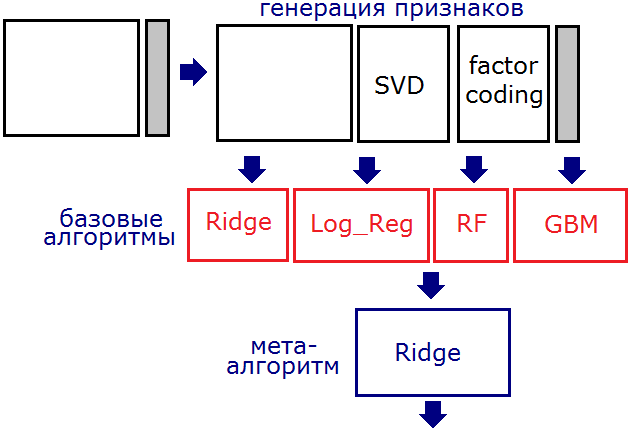

## Простой стекинг своими руками (2 балла)

In [28]:
class StackingRegressionSolver:
    def __init__(self, base_estimators: list, meta_estimator):
        self._base_estimators = [n_est[-1] for n_est in base_estimators]
        self._meta_estimator = meta_estimator

    # def get_params(self, deep=True):
    #     # return {"alpha": self.alpha, "recursive": self.recursive}
    #     return {'LR__fit_intercept': self._meta_estimator.fit_intercept}

    def _fit_base(self, X: pd.DataFrame, y: pd.Series) -> None:
        for estimator in self._base_estimators:
            estimator.fit(X.values, y)

    def _predict_base(self, X: pd.DataFrame) -> pd.DataFrame:
        return pd.concat([pd.DataFrame({f'{type(estimator).__name__}': estimator.predict(X.values)}) for estimator in self._base_estimators], axis=1)


    def fit(self, X: pd.DataFrame, y: pd.Series):
        self._fit_base(X, y)
        meta_features = self._predict_base(X)
        self._meta_estimator.fit(meta_features.values, y)

    def predict(self, X: pd.DataFrame) -> pd.Series:
        meta_features = self._predict_base(X)
        return self._meta_estimator.predict(meta_features.values)

Возьмем в качестве возможных моделей (то есть чем может быть мата-модель и базовые алгоритмы): LinearRegression, SVR, DecisionTreeRegressor, Ridge, Lasso и для каждой такой комбинации обучим стеккинг. Так как прогнать стеккинг для каждой вариации слишком долго, случайно выберем несколько семплов из списка всех возможных вариаций.

После найдем лучший результат и для него преберём гиперпараметры ([for help](https://stackoverflow.com/questions/61711896/combine-gridsearchcv-and-stackingclassifier))

In [204]:
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [12]:
from collections import defaultdict, Counter

In [106]:
from random import sample
# from tqdm import tqdm
import random
import re

random.seed(1337)

def get_data_ens(X_train, y_train, X_test, y_test,
                 RegressionSolver, temp: list,
                 n: int = 150, stck=True, blndg=False,
                 X_val=None, y_val=None) -> pd.DataFrame:
    """
    Из всего спика групп моделей temp случайно выбираем n групп для получения резульатата
    """

    def get_names_letters(_list_of_models: list) -> list:
            return list(map(lambda x: ''.join(re.findall('[A-Z]+', type(x()).__name__)), _list_of_models))


    data = {'list_of_models': [], 'r2_score': [], 'mse': []}
    for list_of_models in tqdm(sample(temp, n), leave=False):
        names = get_names_letters(list_of_models)

        # тут отбираем только те списки имен, которые не повторяются
        # то есть считаем, что базовые алгоритмы не могут повторяться
        # if len(names[:-1]) != len(set(names[:-1])):
            # continue
        # Update: будем, счтитаь, что в стеккинге могут быть повторения базовых алгоритмов 

        # так как встроенный стеккинг не позволяет использовать одинаковые
        # имена для базовых алгоритмов придется для каждой группы изменить совпадающие имена

        if RegressionSolver is StackingRegressor:
            d_names = Counter(names[:-1])
            for i, name in enumerate(names[:-1]):
                # цифры для одинаковых моделей идут в обратном порядке, ну ничего страшного, жить можно)
                names[i] = f'{names[i]}_{d_names[name]}'
                d_names[name] -= 1

            base_models = [[names[i], _class()] for i, _class in enumerate(list_of_models[:-1])]
        else:
            base_models = [[names[i], _class()] for i, _class in enumerate(list_of_models[:-1])]
        
        meta_model = list_of_models[-1]()
        r_solver = RegressionSolver(base_models, meta_model)

        if stck:
            r_solver.fit(X_train, y_train)
        elif blndg:
            r_solver.fit(X_train, y_train, X_val, y_val)

        y_pred = r_solver.predict(X_test)

        data['list_of_models'].append(names)
        data['mse'].append(mse(y_test, y_pred))
        data['r2_score'].append(r2_score(y_test, y_pred))

    return pd.DataFrame(data)

In [14]:
from itertools import combinations_with_replacement, combinations, product

# initializing list
_base_class_models = [LinearRegression, SVR, DecisionTreeRegressor, Ridge, Lasso]

# Получаем все возможные вариыции групп "базовые алгоритмы -- мета-модель"
# которые будут хранится в списке temp
temp = []
for i in range(2, 6):
    temp += list(product(_base_class_models, repeat=i))

In [68]:
# df1 = get_data_ens(X_train, y_train, X_test, y_test, StackingRegressionSolver, temp)

# так как слишком долго каждый раз прогонять ячейку выше, дальше будем загружать полученный ранее резульатат
df1 = pd.read_csv('df1.csv')
strs_of_models_names = [str(model_name) for model_name in df1['list_of_models']]


In [ ]:
# df1.to_csv('df1.csv', index=False)

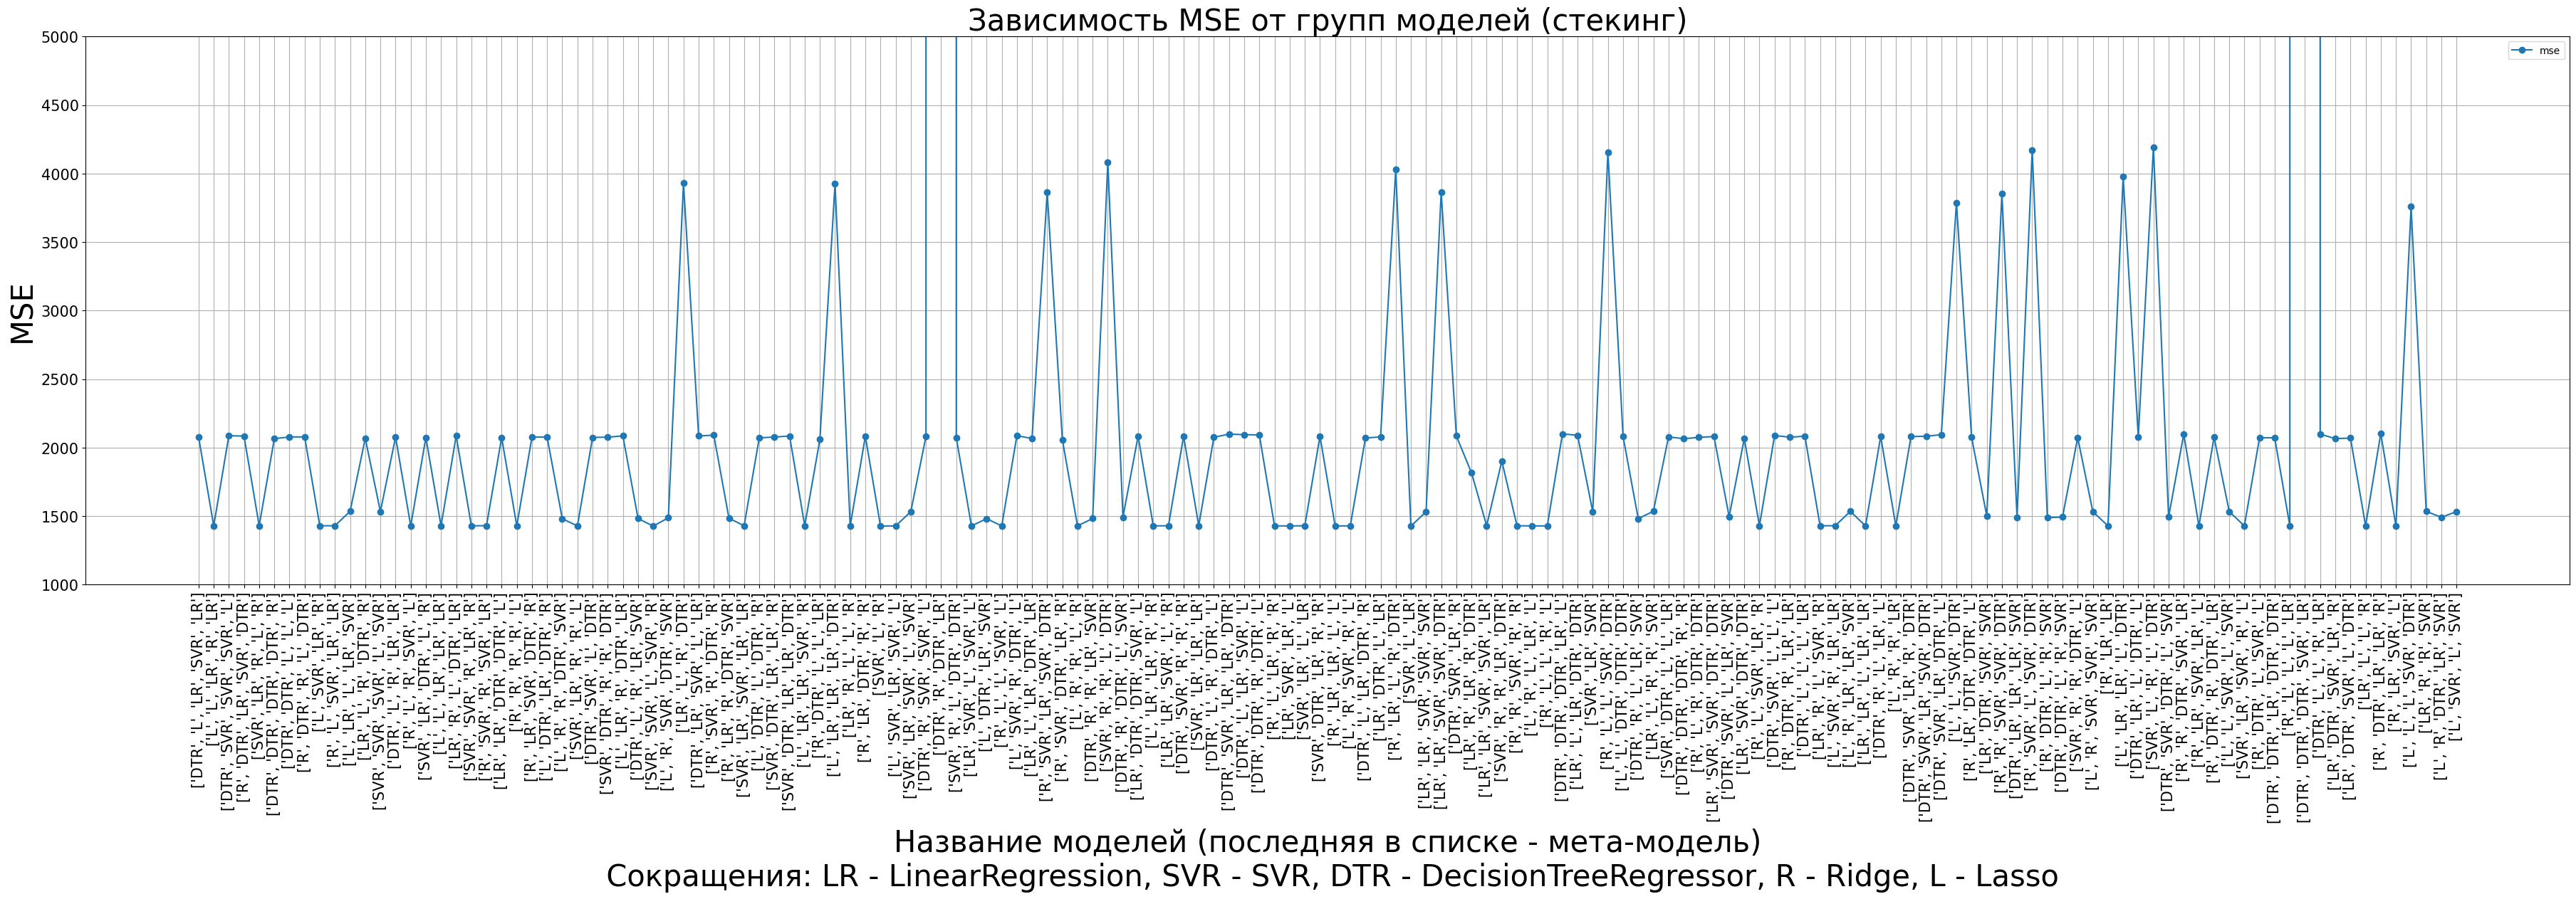

In [69]:
plt.figure(figsize=(45, 10))
plt.plot(strs_of_models_names, df1['mse'], label='mse', marker='o')
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
# plt.xticks(visible=False)
plt.ylim(1000, 5000)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('MSE', size=30)
plt.legend()
plt.title('Зависимость MSE от групп моделей (стекинг)', size=30)
plt.grid()
plt.show()

# Знаю, что график плохой и неудобный для чтения, но это только ради того, чтобы посмотреть на все наши данные вместе
# (немного лучше станет, если увеличить картинку),
# Но тут, например, видно, что есть два огромных выброса, поэтому сокртаил пределы отображения,
# а также в среднем, MSE колеблется между двумя значениями для разных групп (не считая нескольких выбросов)


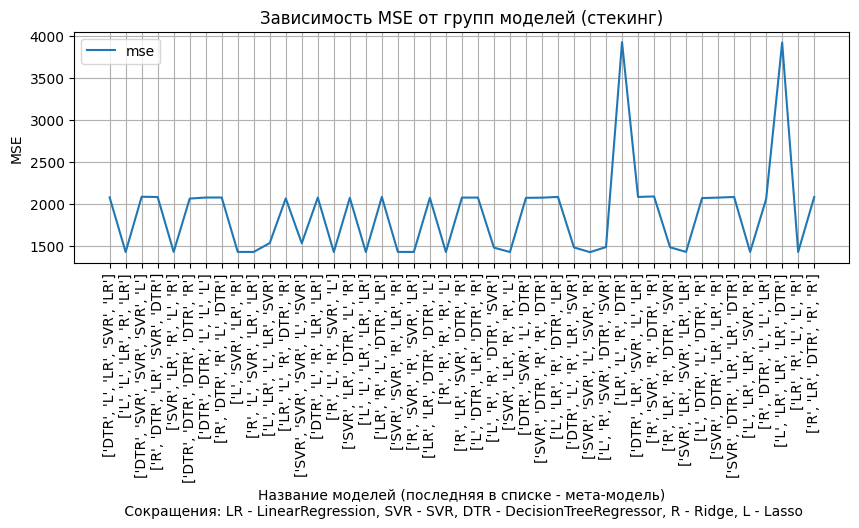

In [70]:
# посмотрим отдельно на первые 45 строчек данных

plt.figure(figsize=(10, 3))

plt.plot(strs_of_models_names[:45], df1['mse'][:45], label='mse')
plt.xticks(rotation=90)
plt.yticks()
# plt.xticks(visible=False)
# plt.ylim(0, 5000)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от групп моделей (стекинг)')
plt.grid()
plt.show()

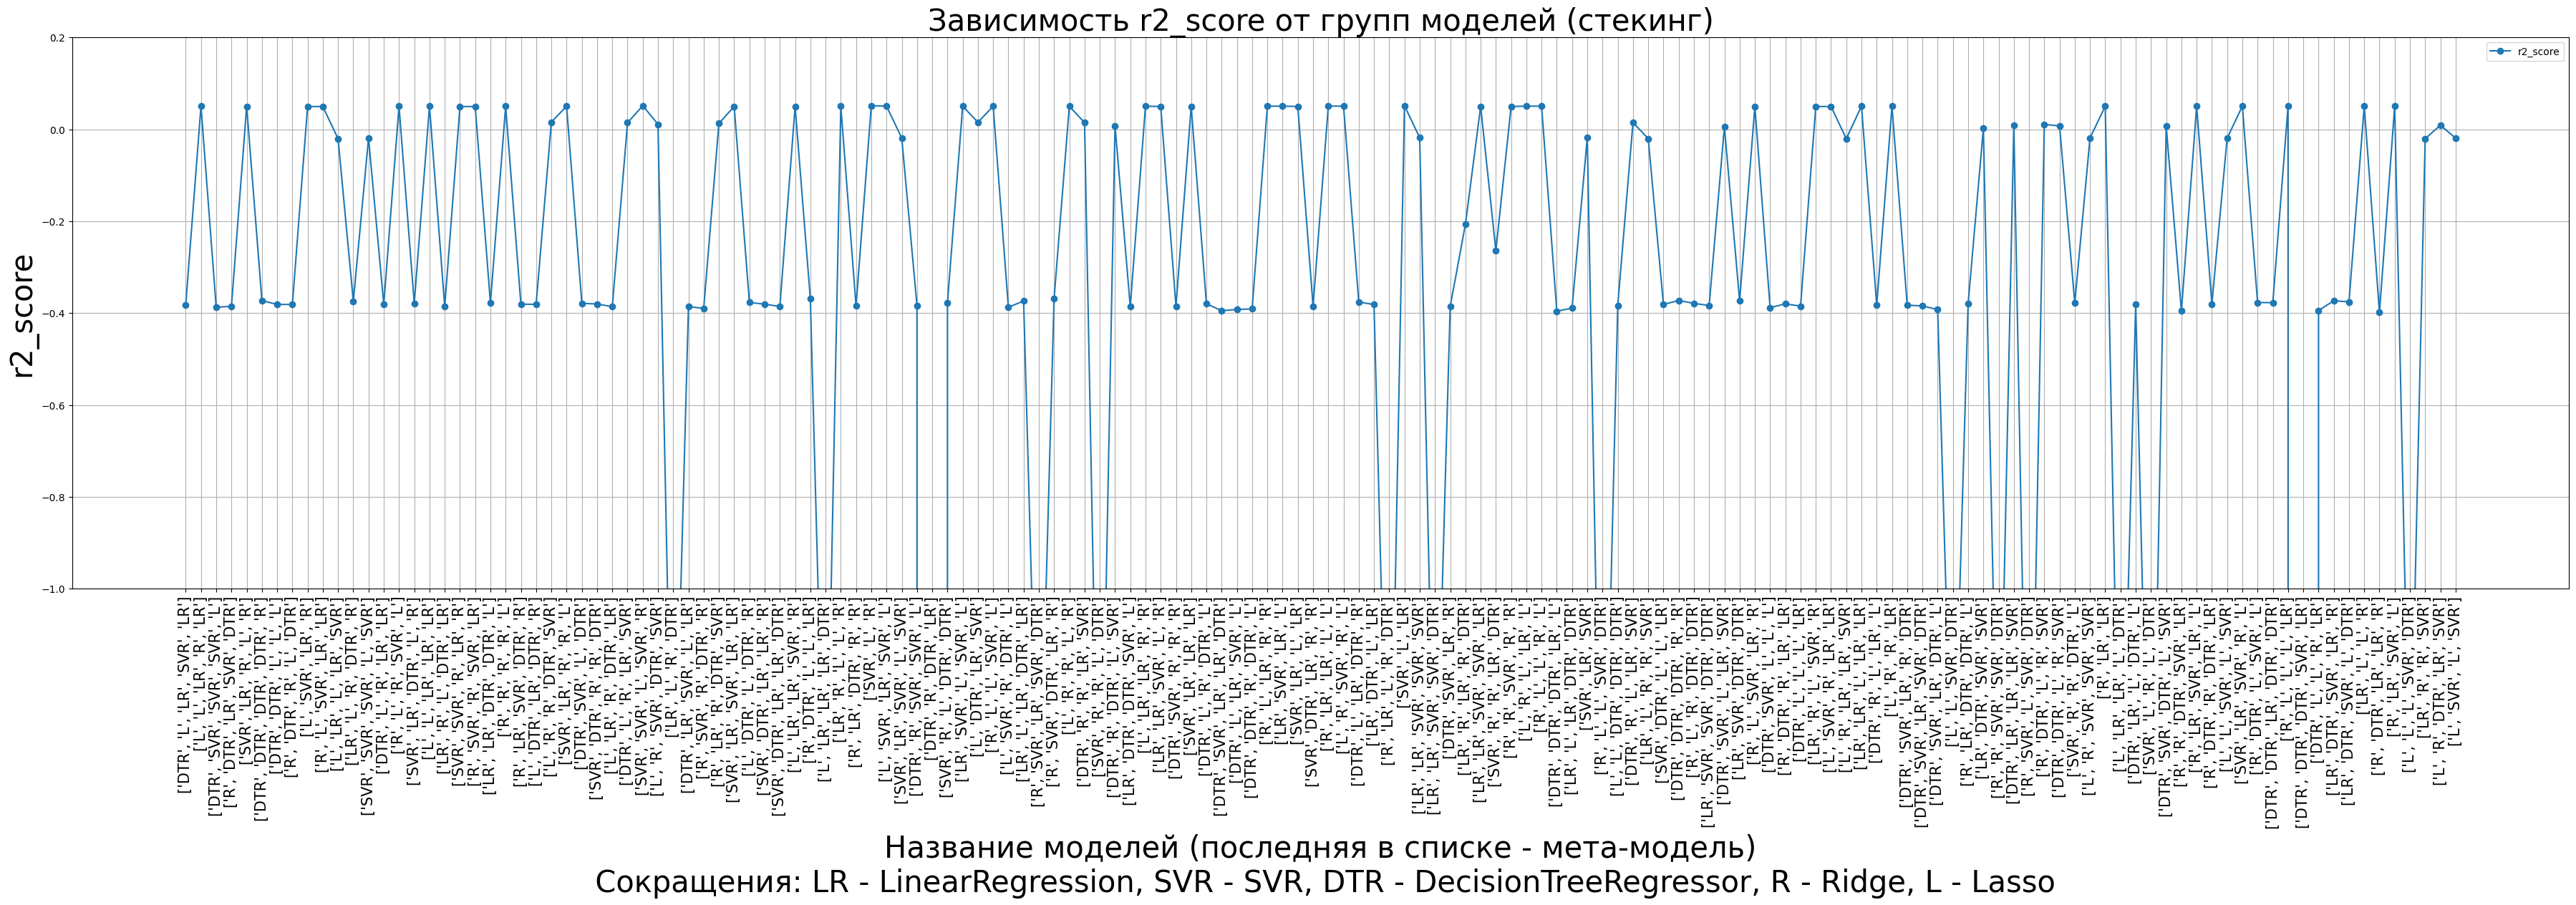

In [71]:
plt.figure(figsize=(45, 10))
plt.plot([str(model_name) for model_name in df1['list_of_models']], df1['r2_score'], label='r2_score', marker='o')

plt.xticks(rotation=90, size=15)
# plt.xticks(visible=False)
plt.ylim(-1, 0.2)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('r2_score', size=30)
plt.legend()
plt.title('Зависимость r2_score от групп моделей (стекинг)', size=30)
plt.grid()
plt.show()

# Аналогично и тут

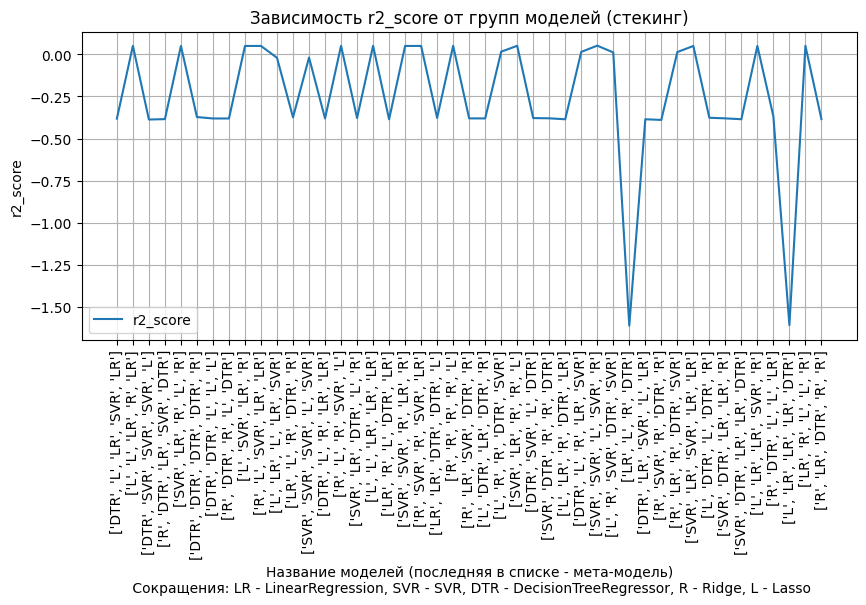

In [72]:
# посмотрим на r2 скоры первых 45 ансамблей

plt.figure(figsize=(10, 4))
plt.plot([str(model_name) for model_name in df1['list_of_models']][:45], df1['r2_score'][:45], label='r2_score')
plt.xticks(rotation=90)
# plt.xticks(visible=False)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('r2_score')
plt.legend()
plt.title('Зависимость r2_score от групп моделей (стекинг)')
plt.grid()
plt.show()

Теперь выберем лучший ансамбль по значению MSE.

In [ ]:
_best = df1[df1['mse'] == min(df1['mse'])]
best_group = _best['list_of_models']
_best

list_of_models  r2_score          mse
30  [SVR, SVR, L, SVR, R]  0.051562  1427.154066

In [15]:
# Слишком сложно получается, если пытатся засунуть собственный класс стекинга в GridSearchCV
# Поэтому просто обучим стекинг на некоторых комбинациях гиперпараметров.
from random import choice

SVR_hypp = [{'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
            {'SVR__C': np.logspace(-2, 2, 10)}, 
            {'SVR__coef0': np.linspace(-1, 1, 10)},
            {'SVR__gamma': ['scale', 'auto']},
            {'SVR__degree': np.arange(1, 10)}]


R_hypp = [{'R__alpha': np.linspace(1, 50, 10)},
          {'R__solver' : ['auto', 'svd', 'cholesky', 'lsqr']}]


L_hypp = [{'L__alpha': np.linspace(1, 50, 10)}]

LR_hypp = [{'LR__fit_intercept': [True, False]}]

DTR_hypp =[{'DTR__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"]},
           {'DTR__splitter' : ["best", "random"]},
           {'DTR__max_depth': np.arange(1, 50)},
           {'DTR__min_samples_split': np.arange(2, 50)},
           {'DTR__min_samples_leaf': np.arange(2, 50)}]

In [16]:
def get_param_sets(_hypp, n=4):
    param_samples = []
    for _ in range(n):
        param_set = []
        for _d in _hypp:
            name = list(_d.keys())[0]
            param_set.append(choice(_d[name]))
        
        param_samples.append(param_set)
    return param_samples

param_samples_DTR = get_param_sets(DTR_hypp)
param_samples_LR = get_param_sets(LR_hypp)
param_samples_SVR = get_param_sets(SVR_hypp)
param_samples_R = get_param_sets(R_hypp)
param_samples_L = get_param_sets(L_hypp)

In [ ]:
def grid_hypp():
    the_best_data = {'set_of_params': [], 'mse': [], 'r2_score': []}

    for SVR_param_sample in tqdm(param_samples_SVR):
        for R_param_sample in tqdm(param_samples_R, leave=False):
            for L_param_sample in tqdm(param_samples_L, leave=False):
                kernel, C, coef0, gamma, degree = SVR_param_sample
                R_alpha, R_solver = R_param_sample
                L_alpha = L_param_sample[0]
                
                best_models = [('SVR', SVR(kernel=kernel, C=C, coef0=coef0, gamma=gamma, degree=degree)),
                            ('SVR', SVR(kernel=kernel, C=C, coef0=coef0, gamma=gamma, degree=degree)),
                            ('L', Lasso(alpha=L_alpha)),
                            ('SVR', SVR(kernel=kernel, C=C, coef0=coef0, gamma=gamma, degree=degree))]
                meta_model = Ridge(solver=R_solver)

                sr = StackingRegressionSolver(best_models, meta_model)
                sr.fit(X_train, y_train)

                y_pred = sr.predict(X_test)

                the_best_data['set_of_params'].append(SVR_param_sample + R_param_sample + L_param_sample)
                the_best_data['mse'].append(mse(y_test, y_pred))
                the_best_data['r2_score'].append(r2_score(y_test, y_pred))
                
    return pd.DataFrame(the_best_data)



In [ ]:
# _c = grid_hypp()

# что бы не прогонять каждый раз ячейку с циклами выше, дальше будем загружать эти данные
_c = pd.read_csv('_c.csv')

In [ ]:
# _c.to_csv('_c.csv', index=False)

In [ ]:
_c[_c['mse'] == min(_c['mse'])]

# ура, мы получили результат лучше, чем без настройки гиперпараметров
# (было: MSE = 1427.154066 r2_score = 0.051562, стало: MSE = 1425.224744, r2_score = 0.052844)

set_of_params          mse  r2_score
52  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
53  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
54  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
55  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
56  ['poly', 12.915496650148826, 1.0, 'auto', 1, 4...  1425.224784  0.052844
57  ['poly', 12.915496650148826, 1.0, 'auto', 1, 4...  1425.224784  0.052844
58  ['poly', 12.915496650148826, 1.0, 'auto', 1, 4...  1425.224784  0.052844
59  ['poly', 12.915496650148826, 1.0, 'auto', 1, 4...  1425.224784  0.052844
60  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
61  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
62  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844
63  ['poly', 12.915496650148826, 1.0, 'auto', 1, 3...  1425.224784  0.052844

## Использование встроенной модели стекинга (0.5 балла)

In [73]:
from sklearn.ensemble import StackingRegressor


# df2 = get_data_ens(X_train, y_train, X_test, y_test, StackingRegressor, temp)

df2 = pd.read_csv('df2.csv')
strs_of_models_names = [str(model_name) for model_name in df2['list_of_models']]


In [ ]:
# df2.to_csv('df2.csv', index=False)

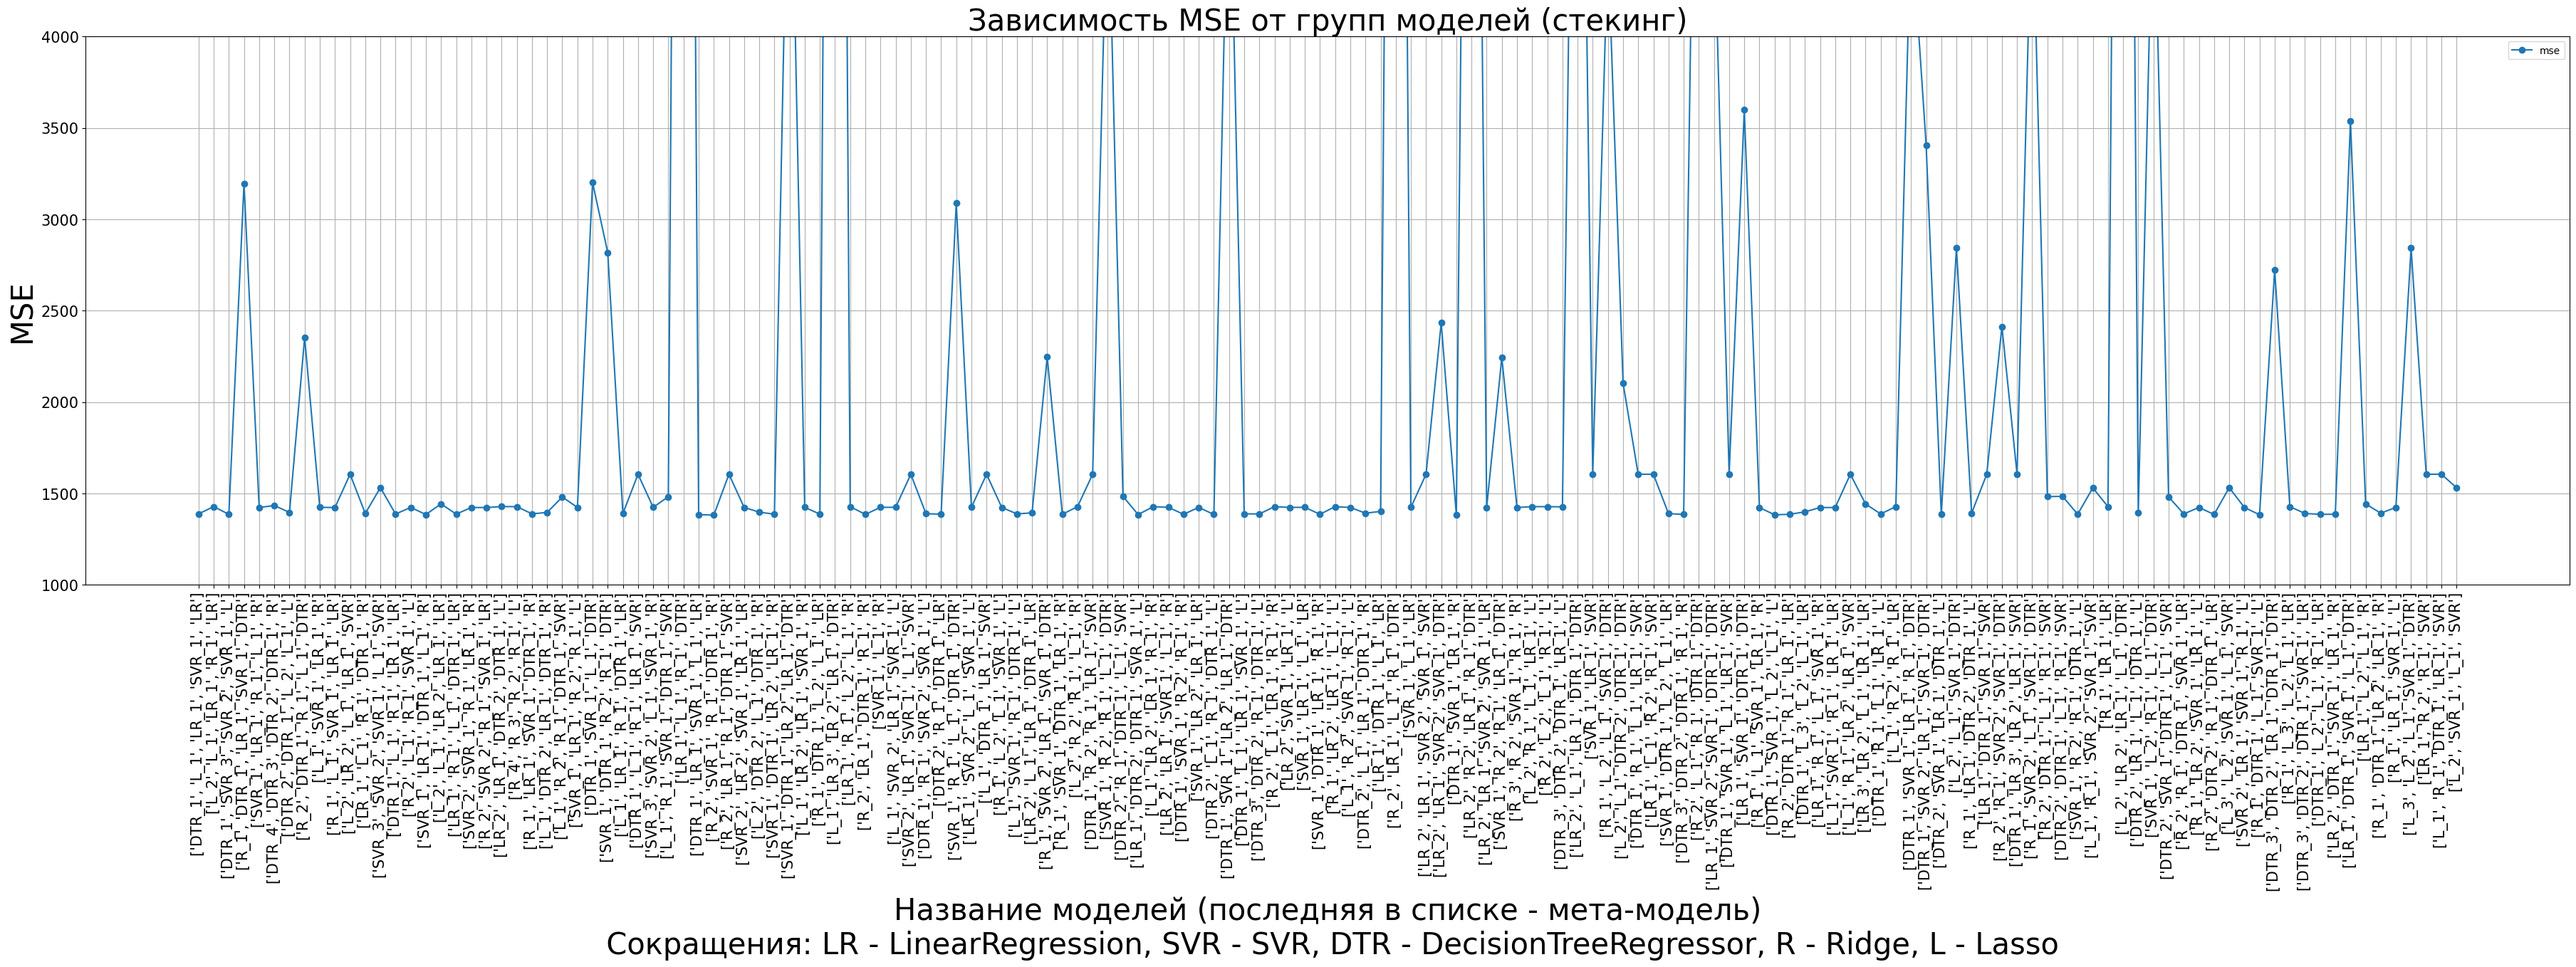

In [74]:
plt.figure(figsize=(45, 10))
plt.plot(strs_of_models_names, df2['mse'], label='mse', marker='o')
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
# plt.xticks(visible=False)
plt.ylim(1000, 4000)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('MSE', size=30)
plt.legend()
plt.title('Зависимость MSE от групп моделей (стекинг)', size=30)
plt.grid()
plt.show()

# Остюда уже можно понять, что больше групп моделей для стекинга стали иметь меньшую ошибку
# видимо, внутри StackingRegressor базовые алгоритмы обучаются как-то иначе, чем просто fit-predict, ну или гиперпараметры настроенны лучше

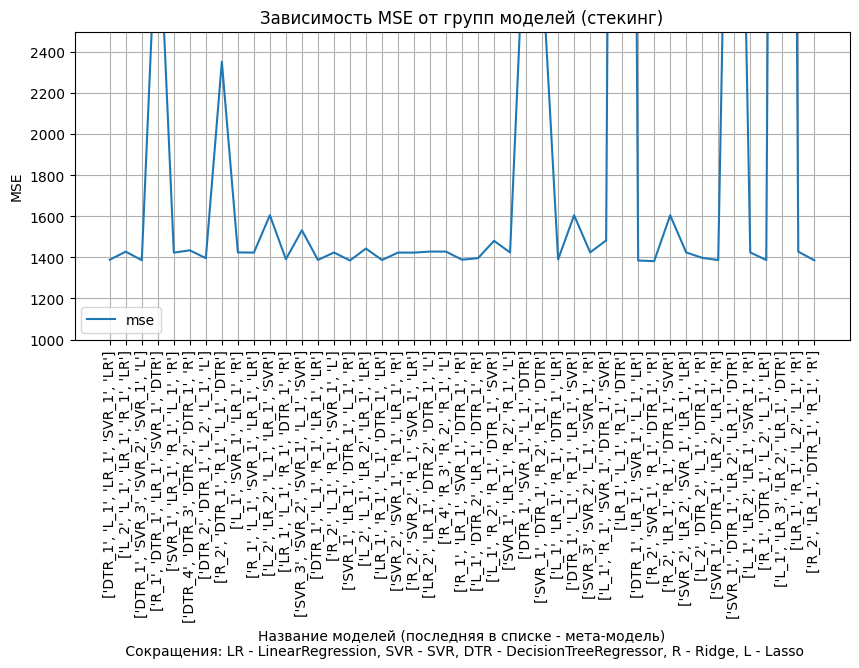

In [75]:
# отдельно для первых 45 групп

plt.figure(figsize=(10, 4))
plt.plot(strs_of_models_names[:45], df2['mse'][:45], label='mse')
plt.xticks(rotation=90)
# plt.xticks(visible=False)

plt.ylim(1000, 2500)
plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от групп моделей (стекинг)')
plt.grid()
plt.show()

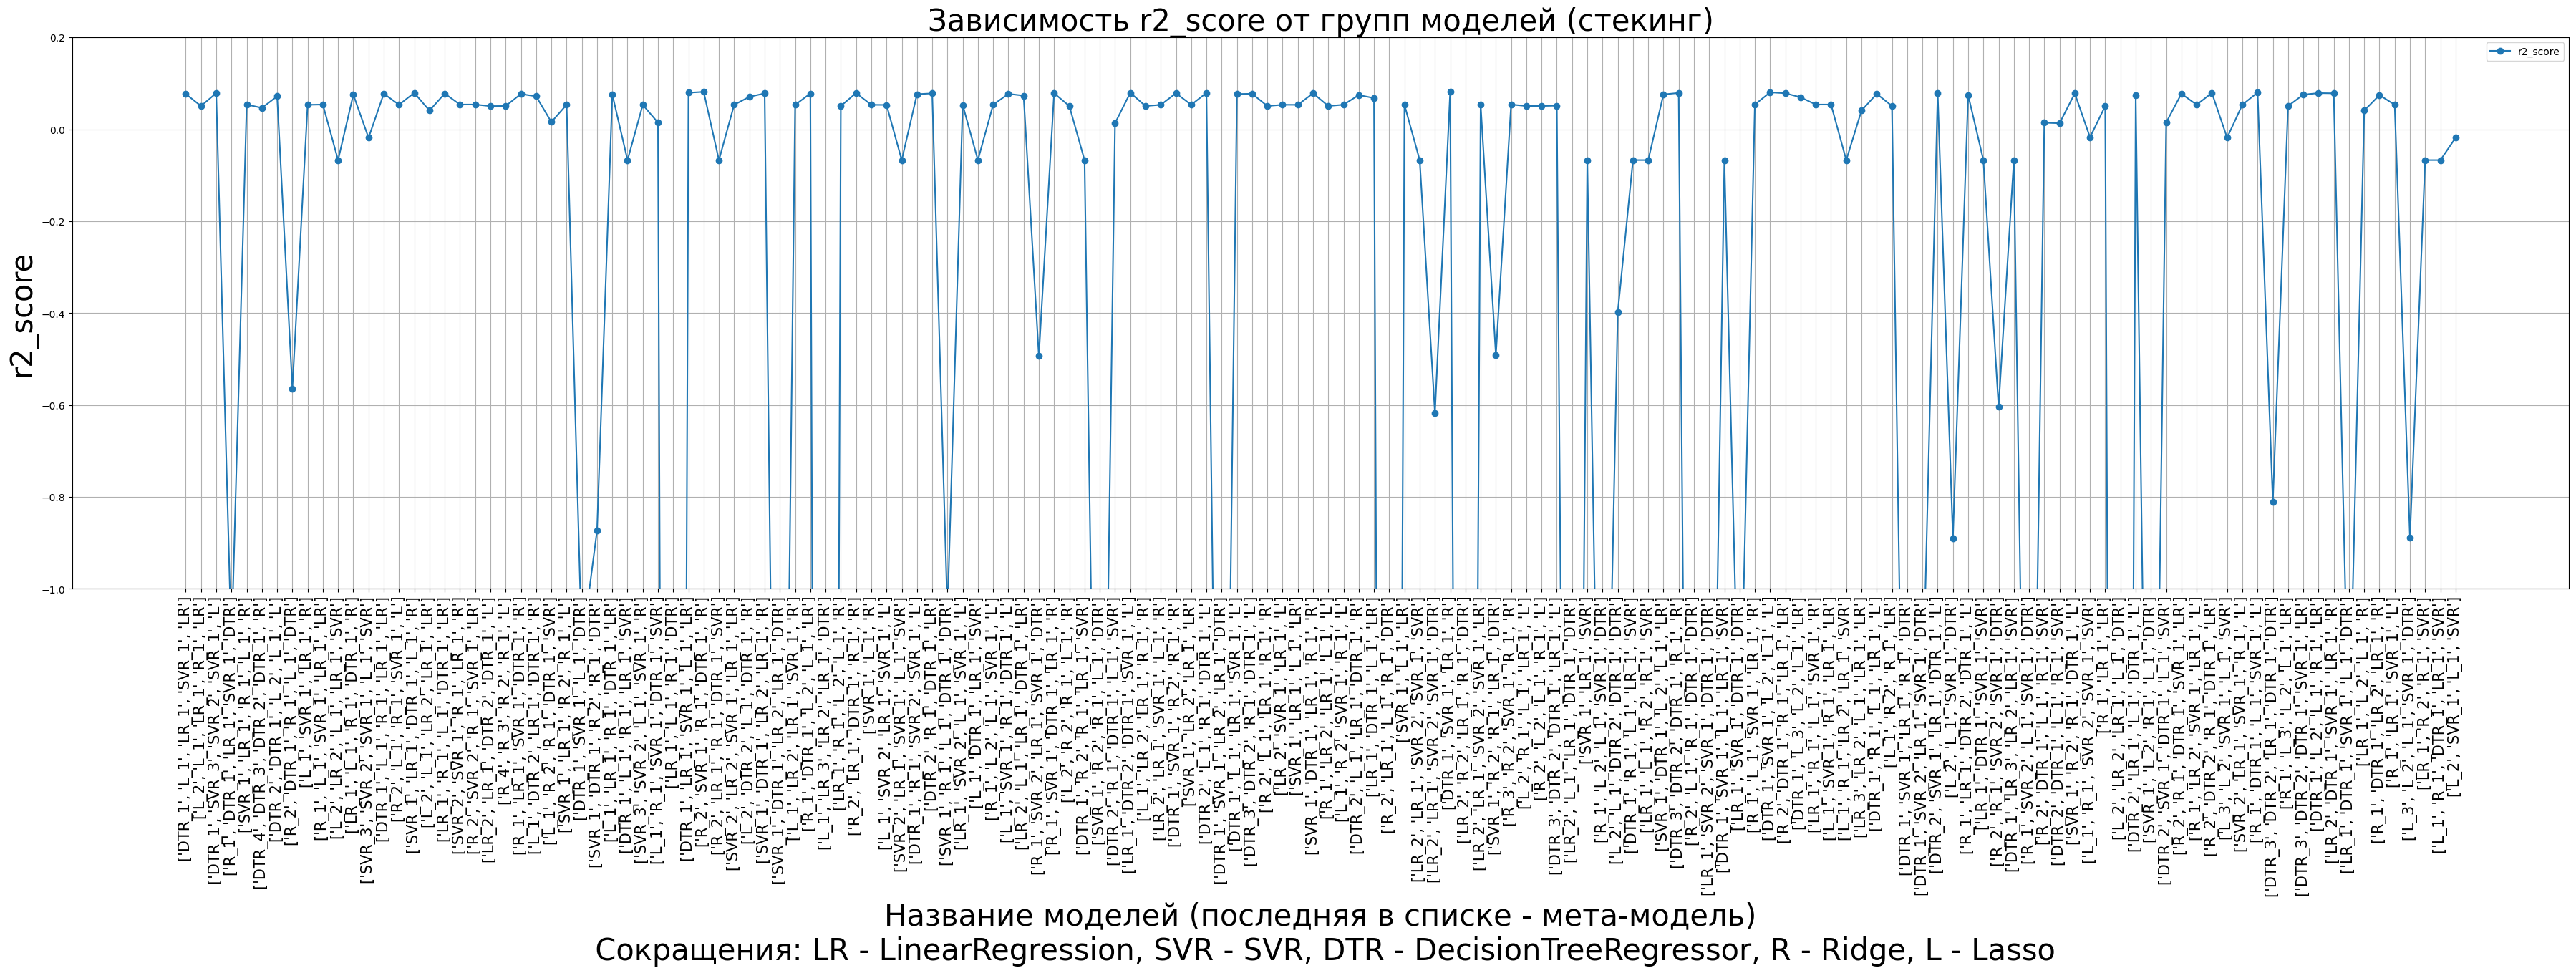

In [76]:
plt.figure(figsize=(45, 10))
plt.plot([str(model_name) for model_name in df2['list_of_models']], df2['r2_score'], label='r2_score', marker='o')

plt.xticks(rotation=90, size=15)
# plt.xticks(visible=False)
plt.ylim(-1, 0.2)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('r2_score', size=30)
plt.legend()
plt.title('Зависимость r2_score от групп моделей (стекинг)', size=30)
plt.grid()
plt.show()

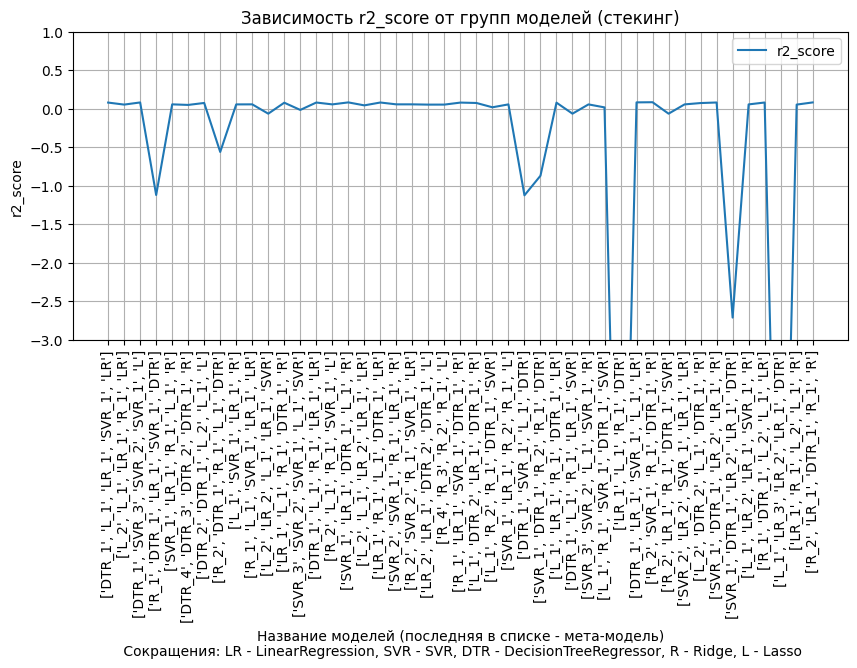

In [77]:
# r2 скоры первых 45 групп

plt.figure(figsize=(10, 4))
plt.plot([str(model_name) for model_name in df2['list_of_models']][:45], df2['r2_score'][:45], label='r2_score');
plt.xticks(rotation=90)
# plt.xticks(visible=False)

plt.ylim(-3, 1)
plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('r2_score')
plt.legend()
plt.title('Зависимость r2_score от групп моделей (стекинг)')
plt.grid()
plt.show()

In [ ]:
_best = df2[df2['mse'] == min(df2['mse'])]
best_group = _best['list_of_models']
_best

list_of_models  r2_score          mse
83  [DTR_1, SVR_1, LR_1, R]  0.081909  1381.490226

In [ ]:
def grid_hypp_2():
    the_best_data = {'set_of_params': [], 'mse': [], 'r2_score': []}

    for DTR_param_sample in tqdm(param_samples_DTR):
        for SVR_param_sample in tqdm(param_samples_SVR, leave=False):
            for R_param_sample in tqdm(param_samples_R, leave=False):
                for LR_param_sample in tqdm(param_samples_LR, leave=False):
                    kernel, C, coef0, gamma, degree = SVR_param_sample
                    R_alpha, R_solver = R_param_sample
                    fit_intercept = LR_param_sample[0]
                    criterion, splitter, max_depth, min_samples_split, min_samples_leaf = DTR_param_sample
                    
                    best_models = [
                                    ('DTR_1', DecisionTreeRegressor(
                                                                    criterion=criterion,
                                                                    splitter=splitter,
                                                                    max_depth=max_depth,
                                                                    min_samples_split=min_samples_split,
                                                                    min_samples_leaf=min_samples_leaf
                                                                    )),
                                    ('SVR_1', SVR(kernel=kernel, C=C, coef0=coef0, gamma=gamma, degree=degree)),
                                    ('LR_1', LinearRegression(fit_intercept=fit_intercept)),
                                ]
                    meta_model = Ridge(solver=R_solver)

                    sr = StackingRegressor(best_models, meta_model)
                    sr.fit(X_train, y_train)

                    y_pred = sr.predict(X_test)

                    # добавляем значения гипперпараметров
                    the_best_data['set_of_params'].append(DTR_param_sample + SVR_param_sample + R_param_sample + LR_param_sample)
                    
                    # добавляем рассчитанные метрики
                    the_best_data['mse'].append(mse(y_test, y_pred))
                    the_best_data['r2_score'].append(r2_score(y_test, y_pred))

    return pd.DataFrame(the_best_data)


In [21]:
# _cc.to_csv('_cc.csv', index=False)

In [22]:
# _cc = grid_hypp_2()

# тут тоже будем загружать полученные ранее данные
_cc = pd.read_csv('_cc.csv')

In [23]:
_cc[_cc['mse'] == min(_cc['mse'])]

# Как и ожидалось, настройка гиперпараметров для данной группы алгоритмов,
# значительно улучшила результат на тестовой выборке:

# Было (для ансамбля (стеккинг) с гип. пар. по умолчанию):
# r2_score: 0.081909, MSE: 1381.490226

# Стало (для ансамбля (стеккинг) с гип. пар. подобранным):
# r2_score: 0.092781, MSE: 1365.131023

set_of_params          mse  r2_score
70  ['absolute_error', 'random', 26, 46, 15, 'sigm...  1365.131023  0.092781

## Блендинг (0.5 балла)

Реализуйте схему блендинга. Для этого разбейте **тестовую** выборку на *валидационную* и *тестовую* части, при необходимости также доработайте код класса `StackingRegressionSolver`. Используйте для обучения базовых моделей обучающую выборку, а для обучения метамодели - валидационную.

Как изменилось качество? Как вы думаете, правдоподобнее ли выглядит такой результат?

[useful link](https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/)

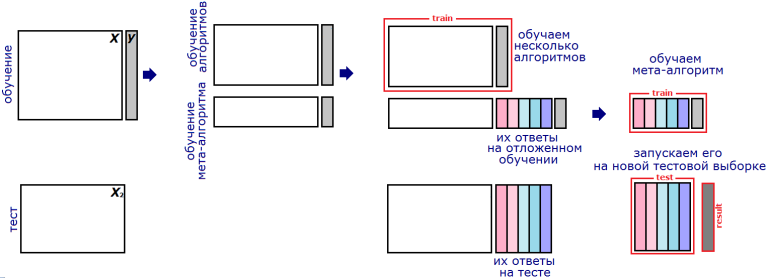



In [104]:
X_test_, X_val_, y_test_, y_val_ = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

In [105]:
class BlendingRegressionSolver(StackingRegressionSolver):
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> None:
        self._fit_base(X_train, y_train)
        meta_features = self._predict_base(X_val)
        self._meta_estimator.fit(meta_features.values, y_val)

In [111]:
# df3 = get_data_ens(X_train, y_train, X_test_, y_test_,
#                    BlendingRegressionSolver, temp,
#                    stck=False, blndg=True,
#                    X_val=X_val_, y_val=y_val_)

# Аналогично и тут, загрузим уже полученные ранее данные
df3 = pd.read_csv('df3.csv')
strs_of_models_names = [str(model_name) for model_name in df3['list_of_models']]

In [110]:
# df3.to_csv('df3.csv', index=False)

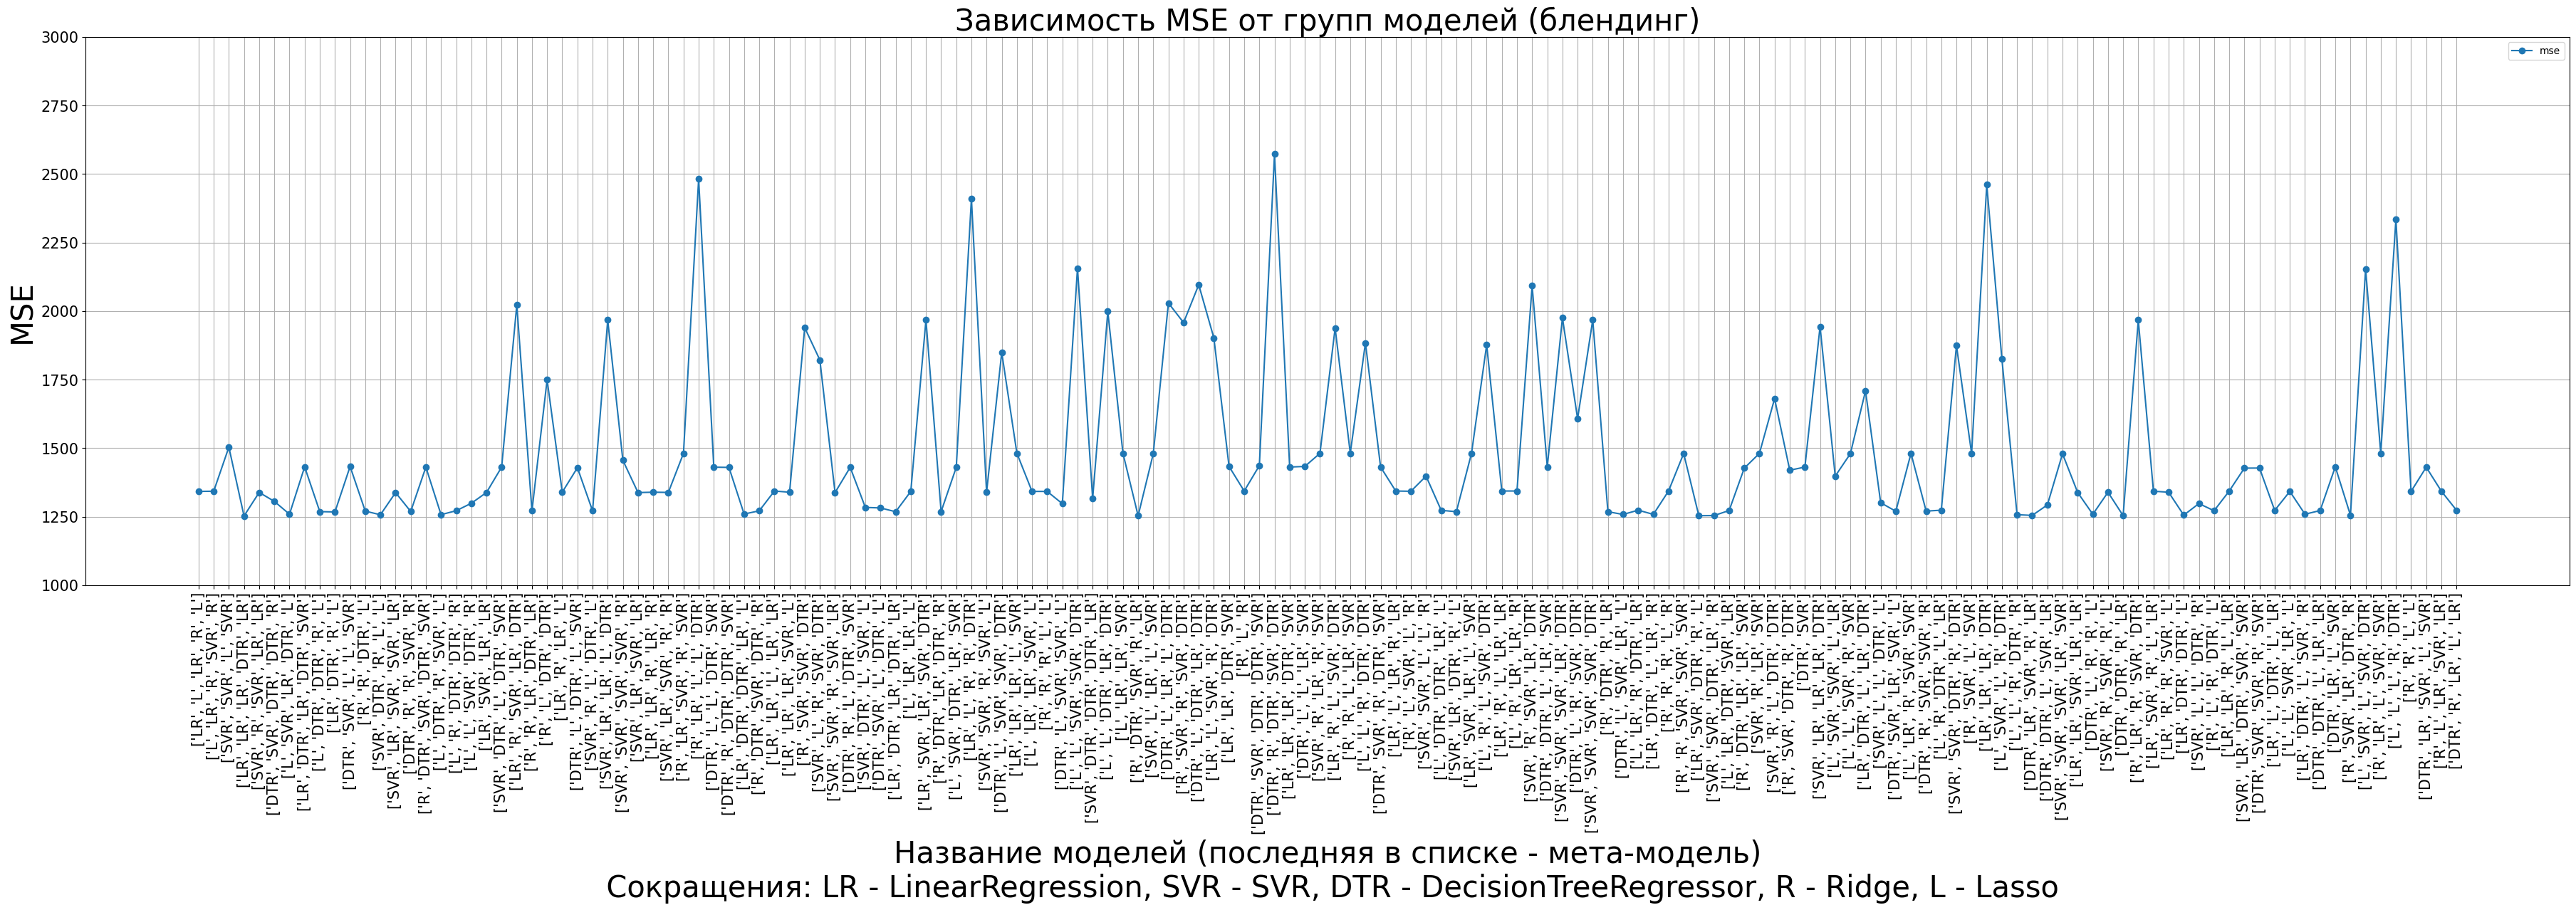

In [112]:
plt.figure(figsize=(45, 10))
plt.plot(strs_of_models_names, df3['mse'], label='mse', marker='o')
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
# plt.xticks(visible=False)
plt.ylim(1000, 3000)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('MSE', size=30)
plt.legend()
plt.title('Зависимость MSE от групп моделей (блендинг)', size=30)
plt.grid()
plt.show()

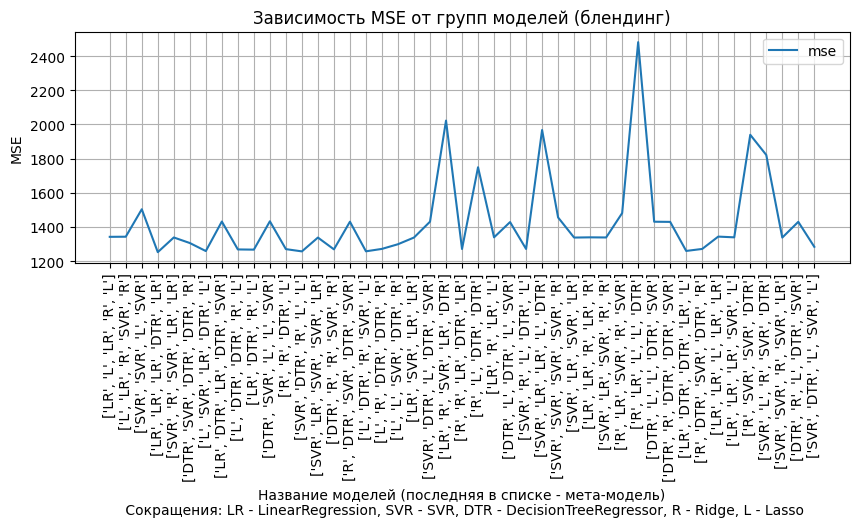

In [113]:
# посмотрим отдельно на первые 45 строчек данных

plt.figure(figsize=(10, 3))

plt.plot(strs_of_models_names[:45], df3['mse'][:45], label='mse')
plt.xticks(rotation=90)
plt.yticks()
# plt.xticks(visible=False)
# plt.ylim(0, 5000)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от групп моделей (блендинг)')
plt.grid()
plt.show()

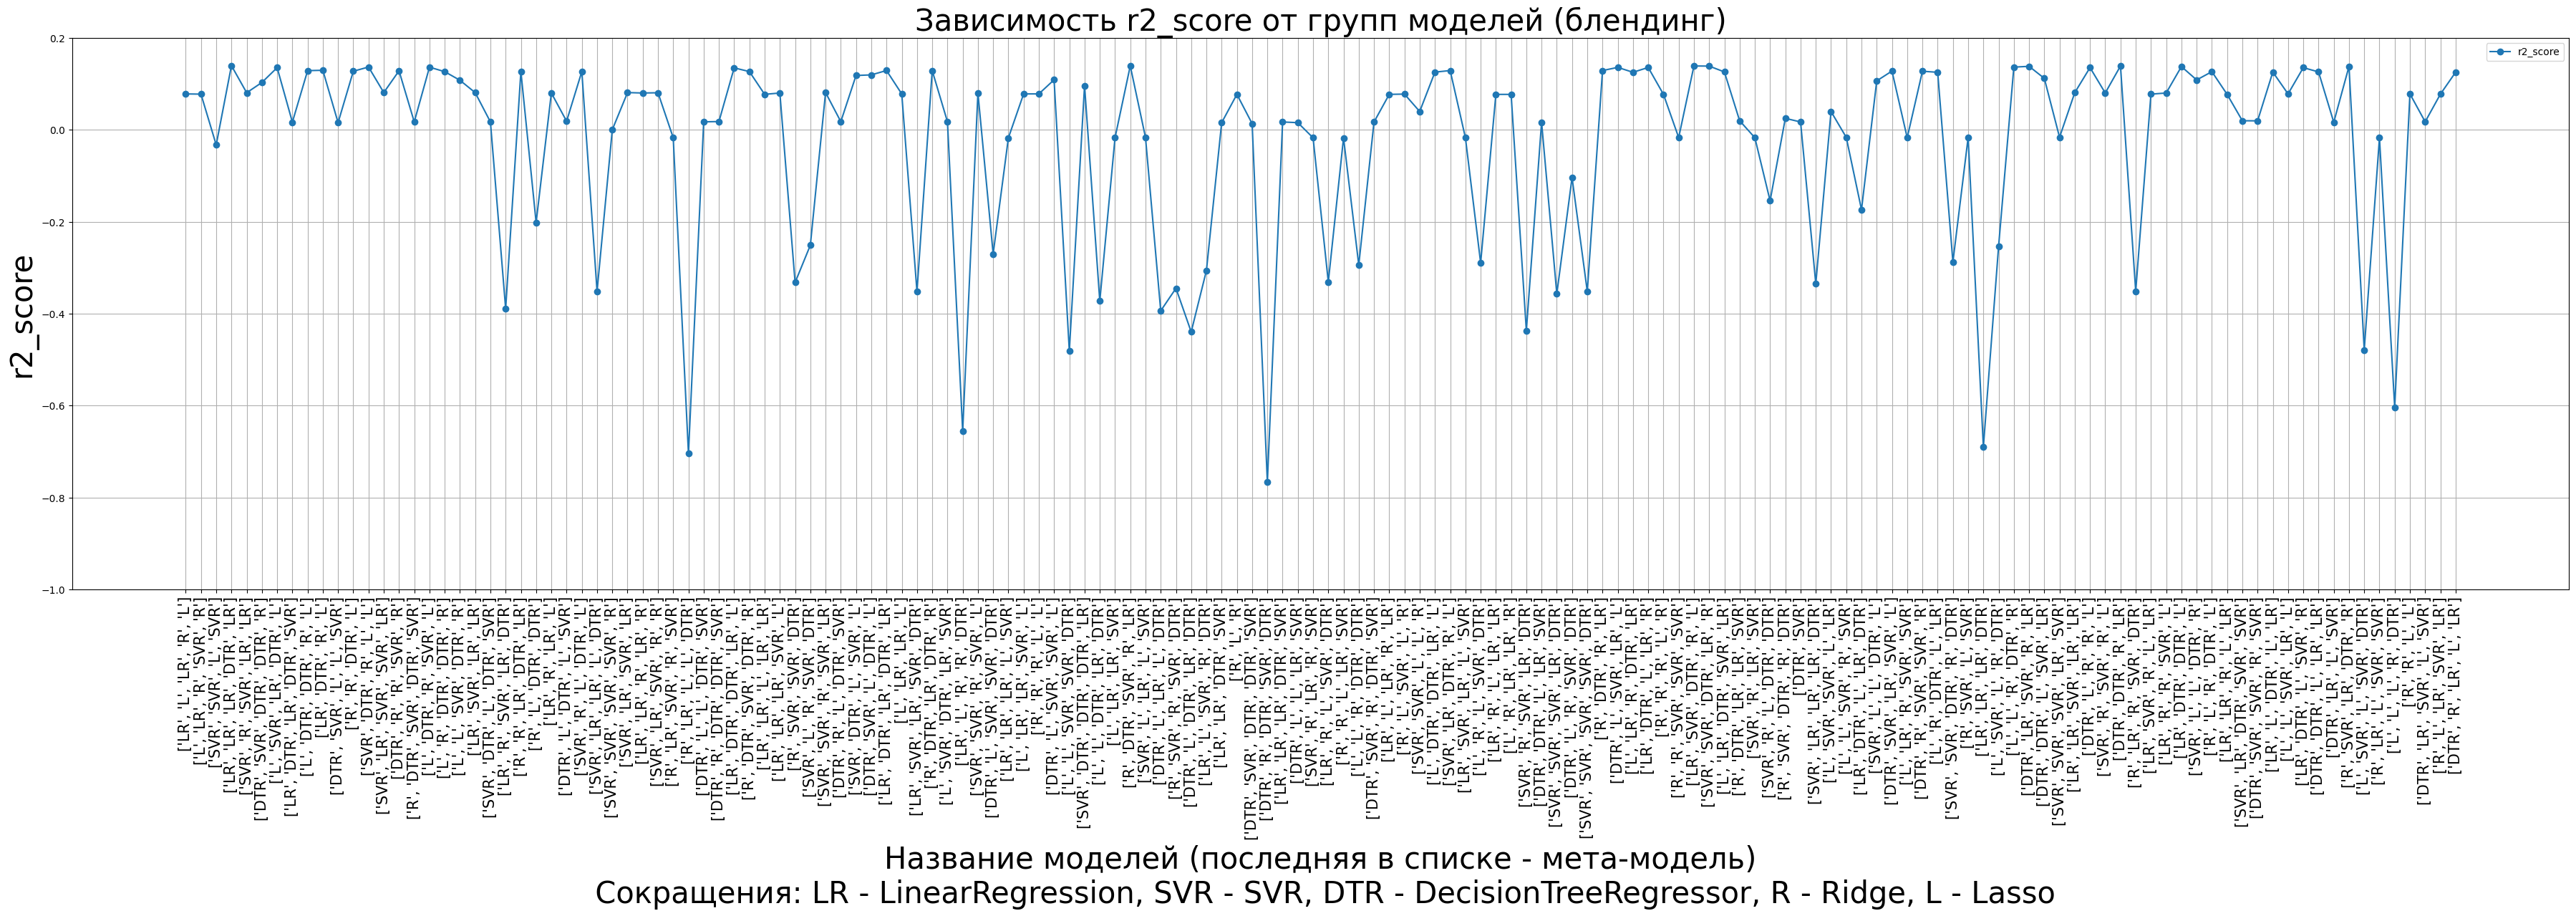

In [114]:
plt.figure(figsize=(45, 10))
plt.plot([str(model_name) for model_name in df3['list_of_models']], df3['r2_score'], label='r2_score', marker='o')

plt.xticks(rotation=90, size=15)
# plt.xticks(visible=False)
plt.ylim(-1, 0.2)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso', size=30)
plt.ylabel('r2_score', size=30)
plt.legend()
plt.title('Зависимость r2_score от групп моделей (блендинг)', size=30)
plt.grid()
plt.show()

# Тут, кстати, уже заметно, что больше ансамблей стали иметь r2_score выше 0

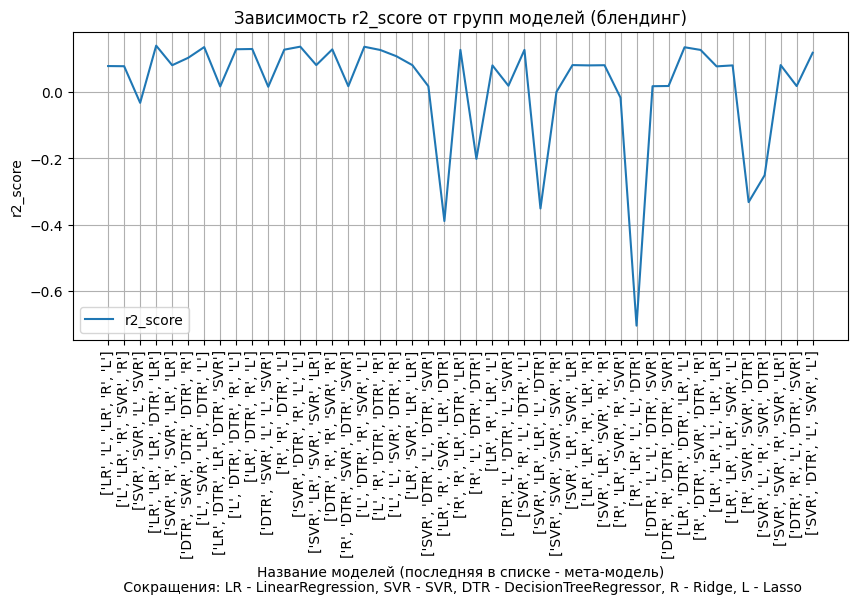

In [115]:
# посмотрим на r2 скоры первых 45 ансамблей

plt.figure(figsize=(10, 4))
plt.plot([str(model_name) for model_name in df3['list_of_models']][:45], df3['r2_score'][:45], label='r2_score')
plt.xticks(rotation=90)
# plt.xticks(visible=False)

plt.xlabel('Название моделей (последняя в списке - мета-модель)\n Сокращения: LR - LinearRegression, SVR - SVR, DTR - DecisionTreeRegressor, R - Ridge, L - Lasso')
plt.ylabel('r2_score')
plt.legend()
plt.title('Зависимость r2_score от групп моделей (блендинг)')
plt.grid()
plt.show()

In [120]:
_best = df3[df3['mse'] == min(df3['mse'])]
best_group = _best['list_of_models']
_best

list_of_models  r2_score          mse
3  ['LR', 'LR', 'LR', 'DTR', 'LR']  0.139581  1252.583806

Блендинг (с дефолтными гиперпараметраами) значительно улучшил результат по сравнению со стекингом (даже при подобранных гиперпараметрах)

Теперь переберём гиперпараметры для этой группы алгоритмов и посмотрим как изменился результат.

In [205]:
def hypp_3():
    the_best_data = {'set_of_params': [], 'mse': [], 'r2_score': []}

    for DTR_param_sample in tqdm(param_samples_DTR, leave=False):
        for LR_param_sample in tqdm(param_samples_LR, leave=False):
            fit_intercept = LR_param_sample[0]
            criterion, splitter, max_depth, min_samples_split, min_samples_leaf = DTR_param_sample
                
            best_models = [
                            ('LR', LinearRegression(fit_intercept=fit_intercept)),
                            ('LR', LinearRegression(fit_intercept=fit_intercept)),
                            ('LR', LinearRegression(fit_intercept=fit_intercept)),
                           
                            ('DTR', DecisionTreeRegressor(
                                                            criterion=criterion,
                                                            splitter=splitter,
                                                            max_depth=max_depth,
                                                            min_samples_split=min_samples_split,
                                                            min_samples_leaf=min_samples_leaf
                                                        )),
                        ]
            meta_model = LinearRegression(fit_intercept=fit_intercept)

            blndg = BlendingRegressionSolver(best_models, meta_model)
            blndg.fit(X_train, y_train, X_val_, y_val_)

            y_pred = blndg.predict(X_test_)

            the_best_data['set_of_params'].append(DTR_param_sample + LR_param_sample)
            the_best_data['mse'].append(mse(y_test_, y_pred))
            the_best_data['r2_score'].append(r2_score(y_test_, y_pred))

    return pd.DataFrame(the_best_data)

In [206]:
_ccc = hypp_3()
# _ccc = pd.read_csv('_ccc.csv')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
# _ccc.to_csv('_ccc.csv', index=False)

In [207]:
_ccc[_ccc['mse'] == min(_ccc['mse'])]

# Тут уже дефолтная настройка гиперепраметров оказалась лучше
# (было: MSE = 1252.583806, r2_score = 0.139581, стало: MSE = 1368.404339, r2_score = 0.060023)

# Такое также могло получиться из-за того, что было перебрано слишком мало значений гиперпараметров
# Поэтому для еще большего улучшения результата можно перебирать гиперпараметры не по сетке,
# а семплировать их из некоторого распределения (например, нормального)
# около дефолтных значений (которые в данном случае дали наилучший результат)

set_of_params          mse  r2_score
12  [squared_error, random, 26, 27, 49, False]  1368.404339  0.060023

Блендинг с гиперпараметрами по умолчанию улучшил результат по сравнению со стекингом, если говорить про правдоподобность блендинга, то она тоже возрасла, но все же довольно далека от приемлего (см. r2_score). 

# Бэггинг (максимум 3 балла)

В этой секции аналогично нужно решить задачу при помощи бэггинга - сначала написанного самостоятельно, а затем взятого из sklearn.

## Бэггинг своими руками (2 балла)

Решите задачу, используя в качестве базовой модели линейную регрессию, дерево и SVM. Какой из алгоритмов в качестве базовой модели дает лучший результат? Почему, как вы думаете?

In [121]:
from typing import Tuple


class BaggingRegressionSolver:
    def __init__(
        self,
        base_estimator_ctor,
        max_samples: float = 1,
        n_estimators: int = 10,
        sample_random_state=42,
        **model_kwargs
    ):
        if max_samples < 0 or max_samples > 1:
            raise ValueError
        
        self._estimators = [base_estimator_ctor(**model_kwargs) for _ in range(n_estimators)]
        self._max_samples = max_samples
        self._random_state = sample_random_state

    def _sample_data(self, X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
        x_i = X.sample(frac=self._max_samples, random_state=self._random_state)
        y_i = y.loc[x_i.index]
        return x_i, y_i

    def fit(self, X: pd.DataFrame, y: pd.Series):
        for estimator in self._estimators:
            x_i, y_i = self._sample_data(X, y)
            estimator.fit(x_i, y_i)

    def predict(self, X: pd.DataFrame) -> pd.Series:
        return np.mean([estimator.predict(X) for estimator in self._estimators], axis=0)

In [122]:
def for_several_models(Solver, reg_list):
    data = {'base_model': [], 'mse': [], 'r2_score': []}
    for reg in tqdm(reg_list):
        brs = Solver(reg)
        brs.fit(X_train, y_train)

        y_pred = brs.predict(X_test)

        data['base_model'].append(str(reg).split('.')[-1][:-2])
        data['mse'].append(mse(y_test, y_pred))
        data['r2_score'].append(r2_score(y_test, y_pred))
    
    return pd.DataFrame(data)

In [123]:
reg_list = [Lasso, Ridge, LinearRegression, SVR, DecisionTreeRegressor]
df4 = for_several_models(BaggingRegressionSolver, reg_list)

  0%|          | 0/5 [00:00<?, ?it/s]

In [124]:
df4.sort_values(by='mse', ascending=True)

base_model          mse  r2_score
2       LinearRegression  1428.796349  0.050471
1                  Ridge  1428.812479  0.050460
0                  Lasso  1477.925010  0.017822
3                    SVR  1595.365333 -0.060225
4  DecisionTreeRegressor  2064.851626 -0.372230

Из датафрейма получается, что лучший результат дает LinearRegression модель в качестве базового алгортма для бэггинга. У деревьев худший результат, так как по дефолту их глубина не ограничивается и поэтому они переобучились. Ridge имеет встроенную регуляризацию, поэтому результат не так хорош (хотя отличие в MSE в 1 знаке после запятой).

## Использование встроенной модели бэггинга (1 балл)

Решите задачу, используя:
- `sklearn.ensemble.BaggingRegressor`. В качестве базовой модели попробуйте линейную регрессию, дерево и SVM
- `sklearn.ensemble.RandomForestRegressor`

Какая модель дает лучший результат? Попробуйте улучшить его, перебрав несколько гиперпараметров (как у базовой модели, так и у ансамбля).



In [ ]:
from sklearn.ensemble import BaggingRegressor


reg_list = [Lasso(), Ridge(), LinearRegression(), SVR(), DecisionTreeRegressor()]
df5 = for_several_models(BaggingRegressor, reg_list)

In [126]:
df5.sort_values(by='mse', ascending=True)

base_model          mse  r2_score
1                  Ridge  1429.701918  0.049869
2       LinearRegression  1430.172845  0.049556
0                  Lasso  1479.352705  0.016873
3                    SVR  1594.850508 -0.059883
4  DecisionTreeRegressor  1661.513085 -0.104185

Лучший результат дала модель Ridge. Попробуем для неё перебрать гиперпараметры, а также посмотрим как будет изменяться ошибка от гиперпараметров ансамбля.

In [127]:
param_samples_R = get_param_sets(R_hypp, 25)

def get_hypp_4():
    data_r = {'ens_params': [], 'r_params': [], 'mse': [], 'r2_score': []}

    for n_estimators in tqdm(range(1, 101, 25)):
        for max_samples in tqdm(range(1, 500, 100), leave=False):
            for alpha, solver in param_samples_R:
                r = Ridge(alpha=alpha, solver=solver)

                br = BaggingRegressor(r, n_estimators=n_estimators, max_samples=max_samples)
                br.fit(X_train, y_train)

                y_pred = br.predict(X_test)

                data_r['r_params'].append([alpha, solver])
                data_r['ens_params'].append([n_estimators, max_samples])
                data_r['mse'].append(mse(y_test, y_pred))
                data_r['r2_score'].append(r2_score(y_test, y_pred))

    return pd.DataFrame(data_r)

In [130]:
# data_r = get_hypp_4()
# data_r.to_csv('data_r.csv', index=False)

# ждать 6 минут мне слишком лень), поэтому тоже сохраним и будем использовать эти данные, просто загружая их
data_r = pd.read_csv('data_r.csv')

In [131]:
data_r[data_r['mse'] == min(data_r['mse'])]

ens_params                    r_params          mse  r2_score
238  [26, 401]  [6.444444444444445, 'svd']  1435.143456  0.046253

Дефолтная настройка гиперпараметров оказалась лучше.

Теперь посмотрим на RandomForestRegressor и переберем у него гиперпарамеры.

In [133]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'Test MSE: {mse(y_test, y_pred)}')
print(f'Test r2 score: {r2_score(y_test, y_pred)}')

Test MSE: 1574.2713692136645
Test r2 score: -0.04620678017380553


Так как перебирать все вариации гиперпараметров нет возмеожности, попробуем делать это жадно для всех гиперпараметров (то есть для каждого гиперпараметра ищем лучший результат и этот гиперпараметр закрепляем и переходим к другим гиперпараметрам и так далее).

In [149]:
for max_depth in tqdm(range(1, 100, 10), leave=False):
    data_rf = defaultdict(list)
    rf = RandomForestRegressor(max_depth=max_depth)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    data_rf['max_depth'].append(max_depth)
    data_rf['mse'].append(mse(y_test, y_pred))
    data_rf['r2_score'].append(r2_score(y_test, y_pred))

data_rf = pd.DataFrame(data_rf)

  0%|          | 0/10 [00:00<?, ?it/s]

In [150]:
data_rf.sort_values(by='mse', ascending=True)

max_depth          mse  r2_score
0         91  1562.185389 -0.038175

In [ ]:
for n_estimators in tqdm(range(1, 200, 10), leave=False):
    data_rf = defaultdict(list)
    rf = RandomForestRegressor(max_depth=91,
                               n_estimators=n_estimators)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    data_rf['n_estimators'].append(n_estimators)
    data_rf['mse'].append(mse(y_test, y_pred))
    data_rf['r2_score'].append(r2_score(y_test, y_pred))

data_rf = pd.DataFrame(data_rf)

In [152]:
data_rf.sort_values(by='mse', ascending=True)

n_estimators          mse  r2_score
0           191  1553.603638 -0.032472

In [153]:
for criterion in tqdm(["squared_error", "absolute_error", "friedman_mse", "poisson"], leave=False):
    data_rf = defaultdict(list)
    rf = RandomForestRegressor(max_depth=91,
                               n_estimators=191,
                               criterion=criterion)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    data_rf['criterion'].append(criterion)
    data_rf['mse'].append(mse(y_test, y_pred))
    data_rf['r2_score'].append(r2_score(y_test, y_pred))

data_rf = pd.DataFrame(data_rf)

  0%|          | 0/4 [00:00<?, ?it/s]

In [154]:
data_rf.sort_values(by='mse', ascending=True)

criterion         mse  r2_score
0   poisson  1502.08217  0.001768

In [157]:
for min_samples_split in tqdm(range(2, 100, 10), leave=False):
    data_rf = defaultdict(list)
    rf = RandomForestRegressor(max_depth=91,
                               n_estimators=191,
                               criterion='poisson',
                               min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    data_rf['min_samples_split'].append(min_samples_split)
    data_rf['mse'].append(mse(y_test, y_pred))
    data_rf['r2_score'].append(r2_score(y_test, y_pred))

data_rf = pd.DataFrame(data_rf)

  0%|          | 0/10 [00:00<?, ?it/s]

In [158]:
data_rf.sort_values(by='mse', ascending=True)

min_samples_split          mse  r2_score
0                 92  1445.108482   0.03963

In [161]:
for min_samples_leaf in tqdm(range(1, 100, 10), leave=False):
    data_rf = defaultdict(list)
    rf = RandomForestRegressor(max_depth=91,
                               n_estimators=191,
                               criterion='poisson',
                               min_samples_split=92,
                               min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    data_rf['min_samples_leaf'].append(min_samples_leaf)
    data_rf['mse'].append(mse(y_test, y_pred))
    data_rf['r2_score'].append(r2_score(y_test, y_pred))

data_rf = pd.DataFrame(data_rf)

  0%|          | 0/10 [00:00<?, ?it/s]

In [163]:
data_rf.sort_values(by='mse', ascending=True)

min_samples_leaf          mse  r2_score
0                91  1418.970082  0.057001

И так, даже жадный перебор гиперпараметров помог значительно уменьшить ошибку. Это победа !!!

# Бустинг (максимум 3 балла)

## Бустинг своими руками (2 балла)

Решите задачу при помощи алгоритма бустинга, используя в качестве базовой модели:
- Линейную регрессию
- Дерево
- Случайный лес

Какая модель дает лучший результат? Попробуйте улучшить его, перебрав несколько гиперпараметров (как у базовой модели, так и у ансамбля).

In [166]:
from abc import ABC, abstractmethod
from collections import deque
from typing import Tuple

from sklearn.dummy import DummyRegressor


class Loss(ABC):
    """
    Базовый класс для функции потерь
    """
    @abstractmethod
    def forward(self, y_true: pd.Series, y_pred: pd.Series) -> float:
        """
        Метод, вычисляющий значение функции потерь
        """
        pass

    @abstractmethod
    def backward(self, y_true: pd.Series, y_pred: pd.Series) -> pd.Series:
        """
        Метод, вычисляющий значение градиента функции потерь по предсказаниям модели
        """
        pass


class MSELoss(Loss):
    def forward(self, y_pred: pd.Series, y_true: pd.Series) -> float:  # посчитаем значение ошибки
        return ((y_pred - y_true) ** 2).mean()

    def backward(self, y_pred: pd.Series, y_true: pd.Series) -> pd.Series:  # посчитаем производную по выходам модели
        return y_true - y_pred


class GradientBoostingRegressionSolver:
    def __init__(
        self,
        base_estimator_ctor,
        n_estimators: int = 10,
        loss: Loss = MSELoss(),
        learning_rate: float = 0.1,
        early_stopping: int = 5,
        **model_kwargs
    ):
        if early_stopping < 0:
            raise ValueError

        self._ctor = base_estimator_ctor
        self._kwargs = model_kwargs
        self._n_estimators = n_estimators
        self._estimators = []
        self._early_stopping = early_stopping
        self._loss = loss
        self._lr = learning_rate
        self._random_state = 42

    def _sample_data(self, X: pd.DataFrame, y: pd.Series, frac: float) -> Tuple[pd.DataFrame, pd.Series]:
        x_sample = X.sample(frac=frac, random_state=self._random_state)
        y_sample = y.loc[x_sample.index]
        return x_sample, y_sample

    def _split_data(self, X: pd.DataFrame, y: pd.Series, val_size: float) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        x_val, y_val = self._sample_data(X, y, val_size)
        x_train, y_train = X[~X.index.isin(x_val.index)], y[~y.index.isin(y_val.index)]
        return x_train, x_val, y_train, y_val

    def predict(self, X: pd.DataFrame) -> pd.Series:
        # Прогоним данные, поступившие на вход, через все модели в ансамбле и сложим ответы
        return np.sum([estimator.predict(X) for estimator in self._estimators], axis=0)

    def fit(self, X: pd.DataFrame, y: pd.Series, val_size: float = 0.1):
        # Хотим получить валидационную выборку, не тратя на это время снаружи
        x_train, x_val, y_train, y_val = self._split_data(X, y, val_size)

        # Создадим и обучим базовую модель
        base_estimator = DummyRegressor()
        base_estimator.fit(x_train, y_train)

        # Добавим базовую модель в список моделей
        self._estimators.append(base_estimator)

        # Посчитаем предсказания как на обучающей, так и на валидационной выборках
        y_pred_train, y_pred_val = base_estimator.predict(x_train), base_estimator.predict(x_val)

        # Посчитаем значение функции потерь для обучения и валидации
        train_loss, val_loss = self._loss.forward(y_pred_train, y_train), self._loss.forward(y_pred_val, y_val)

        # Посчитаем остатки, используя градиент функции потерь
        residuals = -self._lr * self._loss.backward(y_pred_train, y_train)
        # print(f'train loss: {train_loss}, val loss: {val_loss}')

        previous_val_loss, cnt = val_loss, 0
        noi = 0 
        for i in range(self._n_estimators - 1):
            # Создадим очередную модель
            estimator = self._ctor(**self._kwargs)

            # 1. Обучим её и добавим в список моделей
            estimator.fit(x_train, residuals)
            self._estimators.append(estimator)

            # 2. Предскажем ВСЕМ ансамблем данные из обучающей выборки, то же самое сделаем для валидационной
            y_pred_train, y_pred_val = self.predict(x_train), self.predict(x_val)

            # 3. Посчитаем значения функции потерь (на обучении и валидации)
            train_loss, val_loss = self._loss.forward(y_pred_train, y_train), self._loss.forward(y_pred_val, y_val)

            # 4. Обновим остатки для обучающей выборки
            residuals = -self._lr * self._loss.backward(y_pred_train, y_train)
            # print(f'train loss: {train_loss}, val loss: {val_loss}')

            # Если валидационный лосс несколько (self._early_stopping) шагов подряд не уменьшается, то остановим обучение
            if val_loss >= previous_val_loss:
                noi += 1
            if noi >= self._early_stopping:
                break
            previous_val_loss = val_loss

In [ ]:
reg_list = [Lasso, Ridge, LinearRegression, SVR, DecisionTreeRegressor]

df6 = for_several_models(GradientBoostingRegressionSolver, reg_list)

In [168]:
df6.sort_values(by='mse', ascending=True)

base_model          mse  r2_score
0                  Lasso  1507.484027 -0.001822
3                    SVR  1537.578165 -0.021822
1                  Ridge  1647.910387 -0.095145
2       LinearRegression  1649.582635 -0.096256
4  DecisionTreeRegressor  2273.464997 -0.510867

Lasso дало лучший результат, хотя он хуже, чем те, что были получены другими ансамблевыми методами.

Теперь переберем для него и для самого бустинга гиперпараметры и посмотрим на результат.

In [169]:
param_samples_L = get_param_sets(L_hypp, 10)

def hypp_6():
    data_l = {'ens_params': [], 'l_params': [], 'mse': [], 'r2_score': []}

    for n_estimators in tqdm(range(1, 101, 25), leave=False):
        for learning_rate in tqdm(np.linspace(0.0001, 10, 5), leave=False):
            for early_stopping in tqdm(range(1, 100, 25), leave=False):
                for alpha in param_samples_L:

                    br = GradientBoostingRegressionSolver(Lasso,
                                                        n_estimators=n_estimators,
                                                        learning_rate=learning_rate,
                                                        early_stopping=early_stopping,
                                                        alpha=float(alpha[0])
                                                        )
                    br.fit(X_train, y_train)

                    y_pred = br.predict(X_test)

                    data_l['l_params'].append(float(alpha[0]))
                    data_l['ens_params'].append([n_estimators, learning_rate])
                    data_l['mse'].append(mse(y_test, y_pred))
                    data_l['r2_score'].append(r2_score(y_test, y_pred))

    return pd.DataFrame(data_l)

In [ ]:
# data_l = hypp_6()

In [172]:
# data_l.to_csv('data_l.csv', index=False)
data_l = pd.read_csv('data_l.csv')

In [173]:
data_l.shape

(800, 4)

In [174]:
data_l[data_l['mse'] == min(data_l['mse'])]

ens_params   l_params          mse  r2_score
0     [1, 0.0001]   6.444444  1504.770721 -0.000019
1     [1, 0.0001]  11.888889  1504.770721 -0.000019
2     [1, 0.0001]  28.222222  1504.770721 -0.000019
3     [1, 0.0001]  22.777778  1504.770721 -0.000019
4     [1, 0.0001]  50.000000  1504.770721 -0.000019
..            ...        ...          ...       ...
635  [76, 0.0001]  33.666667  1504.770721 -0.000019
636  [76, 0.0001]   1.000000  1504.770721 -0.000019
637  [76, 0.0001]   1.000000  1504.770721 -0.000019
638  [76, 0.0001]  17.333333  1504.770721 -0.000019
639  [76, 0.0001]   1.000000  1504.770721 -0.000019

[320 rows x 4 columns]

Перебор гиперпраметров только чуть-чуть улучшил результат.

Вопросы на дополнительный балл:
- Почему градиент по ответам мы берем со знаком минус?
- Почему в обучении мы домножаем на `learning_rate`, а в предсказаниях этого не делаем?

**Ответ:**

Потому что по определению градиент функции указыает направление наискорейшего роста этой функции, а так как мы хотим минимизировать функционал ошибки, то мы должны 'двигаться' в сторону антиградиента (то есть вектора противоположного градиенту). Поэтому мы используем перед градиентом коэффициент -1.

Потому что `learning_rate` - это один из способов регулировать скорость ***обучения*** (очевидно из названия параметра), а именно длину шага градиентного спуска. Понятно тогда, что в предсказании мы этого не делаем, так как мы уже обучились на тренировочных данных, а на тестовых данных мы только делали предсказания.

# Catboost (1 балл)

Решите эту же задачу при помощи `catboost`, не перебирая гиперпараметры. Насколько лучше или хуже справился катбуст? В качестве эксперимента также попробуйте закинуть в него данные без предобработки (разумеется, выкинув ненужные колонки). Изменилось ли качество? Каким образом?

[link](https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329)

In [95]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00


In [175]:
from catboost import CatBoostRegressor

In [176]:
model = CatBoostRegressor()

model.fit(X_train, y_train)

Learning rate set to 0.053683
0:	learn: 49.7819627	total: 3.14ms	remaining: 3.13s
1:	learn: 49.6389533	total: 5.09ms	remaining: 2.54s
2:	learn: 49.5486240	total: 6.31ms	remaining: 2.1s
3:	learn: 49.4342339	total: 7.84ms	remaining: 1.95s
4:	learn: 49.2732918	total: 9.52ms	remaining: 1.9s
5:	learn: 48.9206321	total: 11.3ms	remaining: 1.87s
6:	learn: 48.8307545	total: 13ms	remaining: 1.84s
7:	learn: 48.7342168	total: 14.7ms	remaining: 1.82s
8:	learn: 48.6556817	total: 16.4ms	remaining: 1.8s
9:	learn: 48.5954500	total: 17.8ms	remaining: 1.76s
10:	learn: 48.3461145	total: 19.6ms	remaining: 1.76s
11:	learn: 48.0818203	total: 21.4ms	remaining: 1.76s
12:	learn: 47.9523681	total: 23.1ms	remaining: 1.75s
13:	learn: 47.8880125	total: 24.4ms	remaining: 1.72s
14:	learn: 47.8471832	total: 26.1ms	remaining: 1.72s
15:	learn: 47.5691506	total: 27.8ms	remaining: 1.71s
16:	learn: 47.5300191	total: 29.4ms	remaining: 1.7s
17:	learn: 47.3638314	total: 31.1ms	remaining: 1.7s
18:	learn: 47.2738328	total: 32.8

In [177]:
y_pred_test = model.predict(X_test)

print('-'*100)
print(f'Test MSE: {mse(y_test, y_pred_test)}')
print(f'R2 score: {r2_score(y_test, y_pred_test)}')

----------------------------------------------------------------------------------------------------
Test MSE: 1636.1387475732836
R2 score: -0.08732171879060946


Catboost алгоритм справился не очень хорошо по сравнеию с другими. Как говорят сами авторы ([video](https://youtu.be/UYDwhuyWYSo)) это может быть связано с тем, что категориальные признаки были обработаны Ohe, а этого делать не рекомендуется для получения хорошего резульата, так как Catboost сам может справиться с обработкой категориальных признаков.

Попробуем для этого его применить к непредобработанным данным.

[link](https://catboost.ai/en/docs/concepts/python-usages-examples?ysclid=lgxmexavan358372902)

In [213]:
df_wcat = pd.read_csv('data_and_catf.csv')

In [214]:
X_train, X_test = df_wcat[df_wcat['split'] == 'Train'], df_wcat[df_wcat['split'] == 'Test']
y_train, y_test = X_train['y'], X_test['y']

X_train.drop('y', axis=1, inplace=True)
X_test.drop('y', axis=1, inplace=True)

X_train.drop('split', axis=1, inplace=True)
X_test.drop('split', axis=1, inplace=True)

In [215]:
X_train.head()

manufacturer  number_of_reviews  number_of_answered_questions  \
0    Air Storm                4.0                           1.0   
1   Q-Workshop                4.0                           1.0   
2       Hornby                1.0                           1.0   
3       Disney                1.0                           1.0   
4       Tamiya                1.0                           1.0   

   average_review_rating                   amazon_category_and_sub_category  
0                    5.0               Sports Toys & Outdoor > Target Games  
1                    4.8                          Games > Dice & Dice Games  
2                    5.0  Die-Cast & Toy Vehicles > Toy Vehicles & Acces...  
3                    5.0                Characters & Brands > Disney > Toys  
4                    5.0              Hobbies > Model Building Kits > Tanks

In [216]:
train_cat = list(X_train.select_dtypes('object').columns.values)
train_cat

['manufacturer', 'amazon_category_and_sub_category']

In [217]:
test_cat = list(X_test.select_dtypes('object').columns.values)
test_cat

['manufacturer', 'amazon_category_and_sub_category']

In [218]:
from catboost import Pool

cb = CatBoostRegressor(random_seed=42)

pool_train = Pool(X_train, y_train, cat_features=train_cat)
pool_test = Pool(X_test, cat_features=test_cat)

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

print('-'*100)
print(f'Test MSE: {mse(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

Learning rate set to 0.053683
0:	learn: 49.7555683	total: 31.3ms	remaining: 31.3s
1:	learn: 49.6237036	total: 71.4ms	remaining: 35.6s
2:	learn: 49.5176709	total: 95.9ms	remaining: 31.9s
3:	learn: 49.4080315	total: 111ms	remaining: 27.7s
4:	learn: 49.3153420	total: 143ms	remaining: 28.4s
5:	learn: 49.2160962	total: 154ms	remaining: 25.5s
6:	learn: 49.1294484	total: 171ms	remaining: 24.3s
7:	learn: 49.0391616	total: 192ms	remaining: 23.8s
8:	learn: 48.9607839	total: 208ms	remaining: 22.9s
9:	learn: 48.8957307	total: 224ms	remaining: 22.2s
10:	learn: 48.8266530	total: 241ms	remaining: 21.7s
11:	learn: 48.7519185	total: 253ms	remaining: 20.8s
12:	learn: 48.7056133	total: 268ms	remaining: 20.3s
13:	learn: 48.6391322	total: 285ms	remaining: 20s
14:	learn: 48.5374623	total: 310ms	remaining: 20.3s
15:	learn: 48.4619593	total: 319ms	remaining: 19.6s
16:	learn: 48.3959310	total: 332ms	remaining: 19.2s
17:	learn: 48.3119474	total: 346ms	remaining: 18.9s
18:	learn: 48.2530923	total: 365ms	remainin

Тадам !!!

Catboost значительно улучшил результат на датасете, в котором были заменены только пропуски и оставлены все категориальные признаки. И это я еще даже гиперпарметры не перебирал.

Ради интереса сделаем из признака `amazon_category_and_sub_category` два отдельных и посмотрим как это повлияет на результат.

In [219]:
def cat(x):
    if pd.isna(x):
        return np.nan
    cat = (x.split('>')[0]).strip()
    return cat

X_train['amazon_category'] = X_train['amazon_category_and_sub_category'].apply(cat)
X_test['amazon_category'] = X_test['amazon_category_and_sub_category'].apply(cat)

In [220]:
def sub_cat(x):
    if pd.isna(x):
        return np.nan
    cat = (x.split('>')[1]).strip()
    return cat

X_train['amazon_sub_category'] = X_train['amazon_category_and_sub_category'].apply(sub_cat)
X_test['amazon_sub_category'] = X_test['amazon_category_and_sub_category'].apply(sub_cat)

In [221]:
X_train.drop(columns=['amazon_category_and_sub_category'], inplace=True)
X_test.drop(columns=['amazon_category_and_sub_category'], inplace=True)

In [222]:
train_cat = list(X_train.select_dtypes('object').columns.values)
train_cat

['manufacturer', 'amazon_category', 'amazon_sub_category']

In [223]:
test_cat = list(X_test.select_dtypes('object').columns.values)
test_cat

['manufacturer', 'amazon_category', 'amazon_sub_category']

In [224]:
cb = CatBoostRegressor(random_seed=42)

pool_train = Pool(X_train, y_train, cat_features=train_cat)
pool_test = Pool(X_test, cat_features=test_cat)

cb.fit(pool_train)
y_pred = cb.predict(pool_test)

print('-'*100)
print(f'Test MSE: {mse(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

Learning rate set to 0.053683
0:	learn: 49.7518689	total: 18.8ms	remaining: 18.8s
1:	learn: 49.6187504	total: 28.9ms	remaining: 14.4s
2:	learn: 49.5097301	total: 33.8ms	remaining: 11.2s
3:	learn: 49.4200139	total: 39.6ms	remaining: 9.87s
4:	learn: 49.3050914	total: 43.9ms	remaining: 8.73s
5:	learn: 49.1929213	total: 50ms	remaining: 8.28s
6:	learn: 49.0944522	total: 54.9ms	remaining: 7.79s
7:	learn: 49.0350553	total: 65.1ms	remaining: 8.07s
8:	learn: 48.9600141	total: 78.9ms	remaining: 8.69s
9:	learn: 48.8993697	total: 85.3ms	remaining: 8.45s
10:	learn: 48.8256807	total: 91.4ms	remaining: 8.22s
11:	learn: 48.7426602	total: 99.8ms	remaining: 8.21s
12:	learn: 48.6861477	total: 113ms	remaining: 8.61s
13:	learn: 48.6162772	total: 126ms	remaining: 8.88s
14:	learn: 48.5413268	total: 135ms	remaining: 8.88s
15:	learn: 48.4507842	total: 145ms	remaining: 8.93s
16:	learn: 48.3526948	total: 156ms	remaining: 9s
17:	learn: 48.2902426	total: 166ms	remaining: 9.07s
18:	learn: 48.2041684	total: 206ms	re

Как и ожидалось это еще сильнее улучшило результат.

А теперь понастраиваем гиперпараметры.

In [227]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_seed=42)

param_grid = {
    'iterations': [250, 350, 500, 600],
    'learning_rate': [0.005, 0.01, 0.02, 0.05],
    'depth': [6, 7, 8, 9],
    'l2_leaf_reg': [1, 2, 3, 5, 6],
    'cat_features': [test_cat]
}

# grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print("Best parameters: ", grid_search.best_params_)

# Best parameters: 
# {'cat_features': ['manufacturer', 'amazon_category', 'amazon_sub_category'], 'depth': 9, 'iterations': 500, 'l2_leaf_reg': 6, 'learning_rate': 0.01}

Best parameters:  {'cat_features': ['manufacturer', 'amazon_category', 'amazon_sub_category'], 'depth': 9, 'iterations': 500, 'l2_leaf_reg': 6, 'learning_rate': 0.01}


In [228]:
# print("Best score: ", -grid_search.best_score_)
# print("Test MSE: ", mse(y_test, y_pred))
# print("Test r2 score: ", r2_score(y_test, y_pred))

# Best score:  2324.2863186140535
# Test MSE:  1299.122232732499
# Test r2 score:  0.13664790280842276

Best score:  2324.2863186140535
Test MSE:  1299.122232732499
Test r2 score:  0.13664790280842276


Настройка гиперпараметров также помогла немного улучшить результат.

И как обычно мем для проверяющего

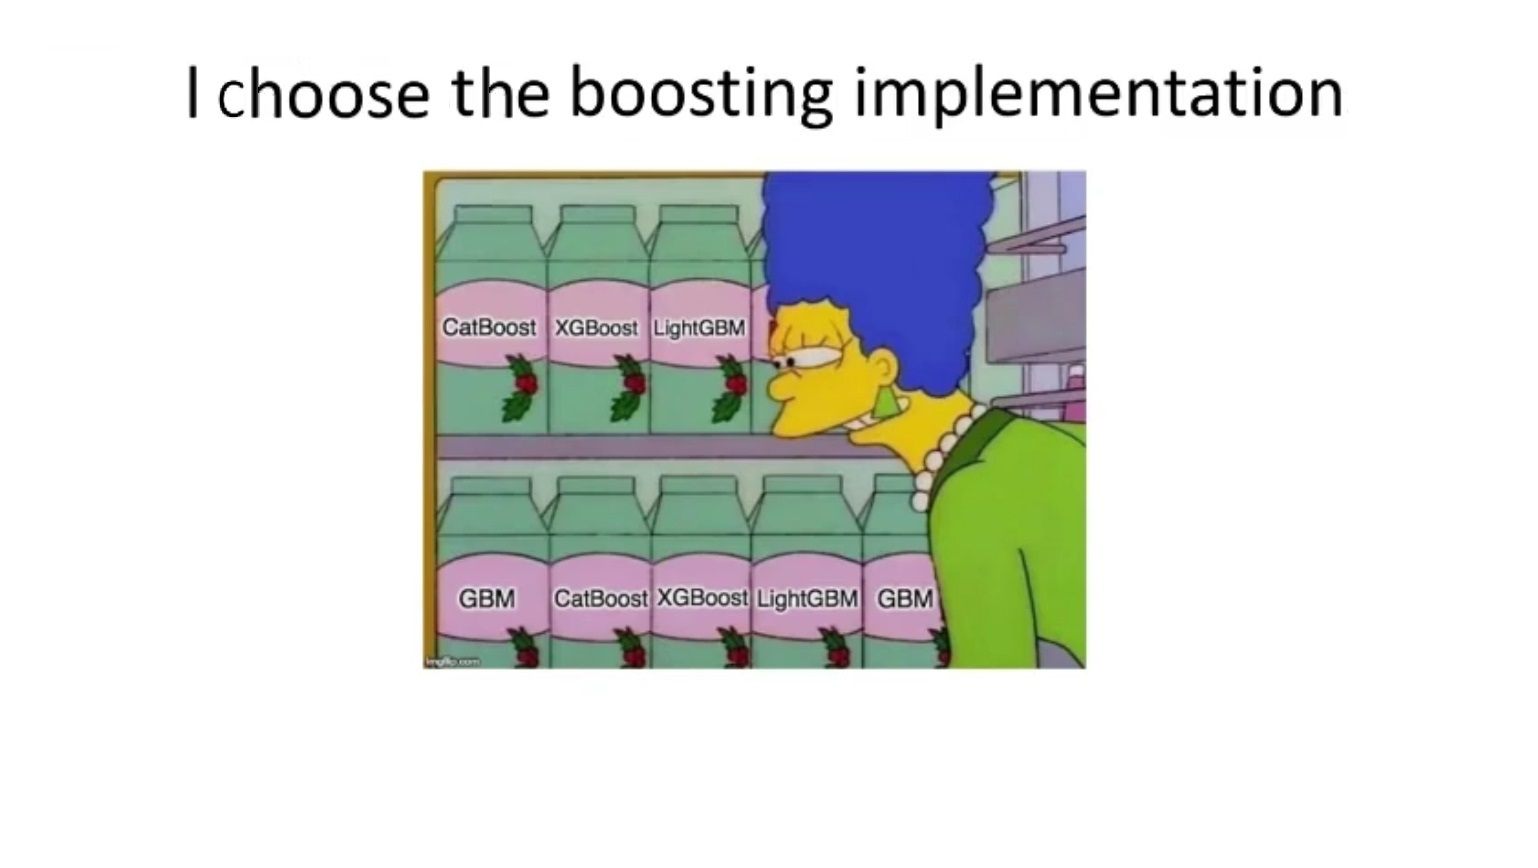